# Table of Contents:

* [Importing and cleaning data](#import)
* [Descriptive Stats](#descr)
* [Correlation Matrix](#cormatrix)
* [Features Selectin RFE](#rfe)
* [Logistic Regression RFE](#logisticrfe)
* [Decision Tree RFE](#decisiontreerfe)
* [KNN](#knn)
* [Random Forest ROC/AUC Confidence Interval](#randomforestconf)
* [K-Fold Cross-validation Decision Tree](#crossvaldt)
* [K-Fold Cross-validation Logistic Regression](#crossvallog)
* [Logistic Regression ROC/AUC Confidence Interval](#logisticconf)
* [Decision Tree & Random Forest Visualizations](#viz)
* [XGBoost](#xgboost)
* [XGBoost AUC Confidence Interval](#xgboostconf) 
* [XGBoost Visualization](#xgboostviz) 

## Importing and cleaning data <a class="anchor" id="import"></a> 

In [102]:
# Import dependencies
from sklearn import tree
import pandas as pd
import numpy as np
import os
import warnings
import timeit
import dask.dataframe as dd
from IPython.display import display 
warnings.filterwarnings("ignore")


In [76]:
df = pd.read_csv('NRD 2013 (machine learning).csv')
df.head()

index  age  aweekend  died    discwt  dispuniform  dmonth  dqtr  drg  \
0      0   89         1   0.0  1.071937          5.0       3     1  372   
1      1   89         1   0.0  1.071937          1.0       6     2  853   
2      2   89         0   0.0  1.071937          5.0       9     3  853   
3      3   48         0   0.0  3.063669          1.0       6     2  330   
4      4   65         0   0.0  1.919980          1.0       5     2  387   

   drgver  ...  _Iage_group_1 _Iage_group_2 _Inew_cc_in_1 _Inew_cc_in_2  \
0      30  ...              0             1             0             1   
1      30  ...              0             1             0             1   
2      30  ...              0             1             1             0   
3      30  ...              1             0             0             0   
4      30  ...              0             1             0             0   

  _Ipayer_2 _Ipayer_3 _Ipayer_4 _Izipinc_qr_2 _Izipinc_qr_3 _Izipinc_qr_4  
0       0.0       0.0       0.0           0.0           0.0           1.0  
1       0.0       0.0       0.0           0.0           0.0           1.0  
2       0.0       0.0       0.0           0.0           0.0           1.0  
3       1.0       0.0       0.0           0.0           1.0           0.0  
4       0.0       0.0       0.0           1.0           0.0           0.0  

[5 rows x 362 columns]

In [77]:
# path = '/Users/aqian/Downloads/'
# #path = 'M:/Edmund'
# os.chdir(path)
#df = pd.read_csv("NRD 2013 (machine learning).csv")
#df.head()

In [78]:
# List all of the column names
print(df.columns.values)

['index' 'age' 'aweekend' 'died' 'discwt' 'dispuniform' 'dmonth' 'dqtr'
 'drg' 'drgver' 'drg_nopoa' 'dx1' 'dx2' 'dx3' 'dx4' 'dx5' 'dx6' 'dx7'
 'dx8' 'dx9' 'dx10' 'dx11' 'dx12' 'dx13' 'dx14' 'dx15' 'dx16' 'dx17'
 'dx18' 'dx19' 'dx20' 'dx21' 'dx22' 'dx23' 'dx24' 'dx25' 'dxccs1' 'dxccs2'
 'dxccs3' 'dxccs4' 'dxccs5' 'dxccs6' 'dxccs7' 'dxccs8' 'dxccs9' 'dxccs10'
 'dxccs11' 'dxccs12' 'dxccs13' 'dxccs14' 'dxccs15' 'dxccs16' 'dxccs17'
 'dxccs18' 'dxccs19' 'dxccs20' 'dxccs21' 'dxccs22' 'dxccs23' 'dxccs24'
 'dxccs25' 'elective' 'female' 'hcup_ed' 'hosp_nrd' 'key_nrd' 'los' 'mdc'
 'mdc_nopoa' 'nchronic' 'ndx' 'necode' 'npr' 'nrd_daystoevent'
 'nrd_stratum' 'nrd_visitlink' 'orproc' 'pay1' 'pl_nchs' 'pr1' 'pr2' 'pr3'
 'pr4' 'pr5' 'pr6' 'pr7' 'pr8' 'pr9' 'pr10' 'pr11' 'pr12' 'pr13' 'pr14'
 'pr15' 'prccs1' 'prccs2' 'prccs3' 'prccs4' 'prccs5' 'prccs6' 'prccs7'
 'prccs8' 'prccs9' 'prccs10' 'prccs11' 'prccs12' 'prccs13' 'prccs14'
 'prccs15' 'rehabtransfer' 'resident' 'samedayevent' 'totchg' 'year'
 'zip

In [79]:
df['ibd_specific_adm']

0        0
1        0
2        0
3        1
4        1
        ..
94493    1
94494    0
94495    0
94496    0
94497    1
Name: ibd_specific_adm, Length: 94498, dtype: int64

In [80]:
# Check the top 5 rows
df.head() 

index  age  aweekend  died    discwt  dispuniform  dmonth  dqtr  drg  \
0      0   89         1   0.0  1.071937          5.0       3     1  372   
1      1   89         1   0.0  1.071937          1.0       6     2  853   
2      2   89         0   0.0  1.071937          5.0       9     3  853   
3      3   48         0   0.0  3.063669          1.0       6     2  330   
4      4   65         0   0.0  1.919980          1.0       5     2  387   

   drgver  ...  _Iage_group_1 _Iage_group_2 _Inew_cc_in_1 _Inew_cc_in_2  \
0      30  ...              0             1             0             1   
1      30  ...              0             1             0             1   
2      30  ...              0             1             1             0   
3      30  ...              1             0             0             0   
4      30  ...              0             1             0             0   

  _Ipayer_2 _Ipayer_3 _Ipayer_4 _Izipinc_qr_2 _Izipinc_qr_3 _Izipinc_qr_4  
0       0.0       0.0       0.0           0.0           0.0           1.0  
1       0.0       0.0       0.0           0.0           0.0           1.0  
2       0.0       0.0       0.0           0.0           0.0           1.0  
3       1.0       0.0       0.0           0.0           1.0           0.0  
4       0.0       0.0       0.0           1.0           0.0           0.0  

[5 rows x 362 columns]

In [81]:
# Make a copy of the dataframe
df_copy = df.copy()
df_copy.head()

index  age  aweekend  died    discwt  dispuniform  dmonth  dqtr  drg  \
0      0   89         1   0.0  1.071937          5.0       3     1  372   
1      1   89         1   0.0  1.071937          1.0       6     2  853   
2      2   89         0   0.0  1.071937          5.0       9     3  853   
3      3   48         0   0.0  3.063669          1.0       6     2  330   
4      4   65         0   0.0  1.919980          1.0       5     2  387   

   drgver  ...  _Iage_group_1 _Iage_group_2 _Inew_cc_in_1 _Inew_cc_in_2  \
0      30  ...              0             1             0             1   
1      30  ...              0             1             0             1   
2      30  ...              0             1             1             0   
3      30  ...              1             0             0             0   
4      30  ...              0             1             0             0   

  _Ipayer_2 _Ipayer_3 _Ipayer_4 _Izipinc_qr_2 _Izipinc_qr_3 _Izipinc_qr_4  
0       0.0       0.0       0.0           0.0           0.0           1.0  
1       0.0       0.0       0.0           0.0           0.0           1.0  
2       0.0       0.0       0.0           0.0           0.0           1.0  
3       1.0       0.0       0.0           0.0           1.0           0.0  
4       0.0       0.0       0.0           1.0           0.0           0.0  

[5 rows x 362 columns]

In [82]:
# Check the back end of the data
df_copy.tail()

index  age  aweekend  died    discwt  dispuniform  dmonth  dqtr  drg  \
94493  94493   44         0   0.0  1.669010          6.0       6     2  331   
94494  94494   44         0   0.0  1.669010          1.0       8     3  346   
94495  94495   44         0   0.0  1.669010          1.0       8     3  393   
94496  94496   52         0   0.0  1.863343          1.0       2     1  472   
94497  94497   72         1   0.0  1.771707          1.0       2     1  385   

       drgver  ...  _Iage_group_1 _Iage_group_2 _Inew_cc_in_1 _Inew_cc_in_2  \
94493      30  ...              1             0             0             0   
94494      30  ...              1             0             0             0   
94495      30  ...              1             0             0             0   
94496      30  ...              1             0             0             1   
94497      30  ...              0             1             1             0   

      _Ipayer_2 _Ipayer_3 _Ipayer_4 _Izipinc_qr_2 _Izipinc_qr_3 _Izipinc_qr_4  
94493       1.0       0.0       0.0           0.0           0.0           1.0  
94494       1.0       0.0       0.0           0.0           0.0           1.0  
94495       1.0       0.0       0.0           0.0           0.0           1.0  
94496       0.0       0.0       0.0           0.0           0.0           0.0  
94497       0.0       0.0       0.0           1.0           0.0           0.0  

[5 rows x 362 columns]

In [83]:
# Check the data 
# Looks like the ibd_readm variables contains "NA" values

df_copy[['nrd_visitlink','ibd_index_hosp', 'dx1', 'new_mi_adm', 'ibd_readm']].head()

nrd_visitlink  ibd_index_hosp    dx1  new_mi_adm  ibd_readm
0        00017u               1  00845           0          0
1        00017u               0   0389           0          1
2        00017u               0  03842           0          1
3        0004o5               1   5559           0          0
4        000dbz               1   5559           0          0

In [84]:
# Recoding the ibd_readm outcome variable
readm_set = set()
for index, row in df_copy[['nrd_visitlink','ibd_readm']].iterrows():
    if row[1] == 1:
        readm_set.add(row[0])
        
readm_list = list(readm_set)

df_copy.loc[df_copy.nrd_visitlink.isin(readm_list), 'ibd_readm'] = '1'
df_copy[['nrd_visitlink','ibd_index_hosp', 'ibd_readm']].head(15)

nrd_visitlink  ibd_index_hosp ibd_readm
0         00017u               1         1
1         00017u               0         1
2         00017u               0         1
3         0004o5               1         0
4         000dbz               1         1
5         000dbz               0         1
6         000dbz               0         1
7         000dbz               0         1
8         000dbz               0         1
9         000mgu               1         0
10        0018do               1         0
11        001nun               1         1
12        001nun               0         1
13        001nun               0         1
14        001nun               0         1

In [85]:
df_copy[['nrd_visitlink', 'pay1', 'ibd_index_hosp', 'ibd_readm']].head(15)

nrd_visitlink  pay1  ibd_index_hosp ibd_readm
0         00017u   1.0               1         1
1         00017u   1.0               0         1
2         00017u   1.0               0         1
3         0004o5   3.0               1         0
4         000dbz   1.0               1         1
5         000dbz   1.0               0         1
6         000dbz   1.0               0         1
7         000dbz   1.0               0         1
8         000dbz   1.0               0         1
9         000mgu   3.0               1         0
10        0018do   2.0               1         0
11        001nun   2.0               1         1
12        001nun   2.0               0         1
13        001nun   2.0               0         1
14        001nun   2.0               0         1

In [86]:
# Number of index hospitalizations
index_hosp_counts = df_copy['ibd_index_hosp'].value_counts()
index_hosp_counts

1    47402
0    47096
Name: ibd_index_hosp, dtype: int64

In [87]:
# Number of readmissions within six months
readm_counts = df_copy['ibd_readm'].value_counts()
readm_counts

1    64373
0    30125
Name: ibd_readm, dtype: int64

In [88]:
# Filter the data so that only patients with an index hospitalizations are in a DataFrame
readm_data_df = df_copy.loc[df_copy["ibd_index_hosp"] == 1, :]

# Check to ensure the filter worked correctly
readm_data_df["ibd_index_hosp"].count()

47402

In [89]:
# Creating deciles by length of follow-up normalized by number of hospitalizations 
readm_data_df['ibd_deciles'] = pd.qcut(readm_data_df['ibdtotlos_alive_fu'], 10, labels=np.arange(10, 0, -1))

readm_data_df.head(15)

index  age  aweekend  died    discwt  dispuniform  dmonth  dqtr  drg  \
0       0   89         1   0.0  1.071937          5.0       3     1  372   
3       3   48         0   0.0  3.063669          1.0       6     2  330   
4       4   65         0   0.0  1.919980          1.0       5     2  387   
9       9   51         0   0.0  2.958993          1.0       3     1  354   
10     10   22         0   0.0  3.109660          1.0       1     1  330   
11     11   33         1   0.0  1.061258          1.0       1     1  313   
19     19   84         0   0.0  2.155742          6.0       5     2  690   
22     22   62         0   0.0  1.863343          5.0       2     1  853   
23     23   40         0   0.0  1.509554          1.0       3     1  389   
30     30   68         1   0.0  2.148695          6.0       5     2  854   
31     31   25         1   0.0  2.079331          1.0       2     1  385   
32     32   82         0   0.0  1.814426          6.0       5     2  247   
33     33   68         1   0.0  1.954297          5.0       2     1  557   
38     38   60         0   0.0  3.040344          1.0       1     1  385   
39     39   40         0   0.0  1.682603          1.0       3     1  385   

    drgver  ...  _Iage_group_2 _Inew_cc_in_1 _Inew_cc_in_2 _Ipayer_2  \
0       30  ...              1             0             1       0.0   
3       30  ...              0             0             0       1.0   
4       30  ...              1             0             0       0.0   
9       30  ...              0             0             0       1.0   
10      30  ...              0             0             0       0.0   
11      30  ...              0             0             0       0.0   
19      30  ...              1             0             0       0.0   
22      30  ...              0             0             0       0.0   
23      30  ...              0             0             0       1.0   
30      30  ...              1             0             1       0.0   
31      30  ...              0             0             0       0.0   
32      30  ...              1             0             1       0.0   
33      30  ...              1             0             1       0.0   
38      30  ...              0             0             0       1.0   
39      30  ...              0             0             0       0.0   

   _Ipayer_3 _Ipayer_4 _Izipinc_qr_2 _Izipinc_qr_3 _Izipinc_qr_4 ibd_deciles  
0        0.0       0.0           0.0           0.0           1.0           2  
3        0.0       0.0           0.0           1.0           0.0           6  
4        0.0       0.0           1.0           0.0           0.0           1  
9        0.0       0.0           0.0           0.0           1.0           8  
10       0.0       0.0           1.0           0.0           0.0           6  
11       0.0       0.0           0.0           0.0           0.0           3  
19       0.0       0.0           0.0           0.0           1.0           3  
22       0.0       0.0           0.0           0.0           0.0           3  
23       0.0       0.0           0.0           0.0           1.0           1  
30       0.0       0.0           0.0           0.0           1.0           5  
31       0.0       1.0           0.0           0.0           0.0           6  
32       0.0       0.0           1.0           0.0           0.0           3  
33       0.0       0.0           0.0           1.0           0.0           1  
38       0.0       0.0           0.0           0.0           1.0           5  
39       1.0       0.0           0.0           0.0           1.0           8  

[15 rows x 363 columns]

In [90]:
# Check for null values
df_copy.isnull().sum()

index               0
age                 0
aweekend            0
died               24
discwt              0
                 ... 
_Ipayer_3         102
_Ipayer_4         102
_Izipinc_qr_2    1414
_Izipinc_qr_3    1414
_Izipinc_qr_4    1414
Length: 362, dtype: int64

In [91]:
# Generate a new variable to identify high-need, high-cost patients

def topDecile(series):
    if series == 1:
        return 1
    else:
        return 0
        
readm_data_df['hnhc_patients'] = readm_data_df['ibd_deciles'].apply(topDecile)

readm_data_df.tail(25)

index  age  aweekend  died    discwt  dispuniform  dmonth  dqtr  drg  \
94449  94449   80         1   0.0  2.148695          1.0       2     1  386   
94451  94451   38         0   0.0  1.700426          1.0       2     1  775   
94452  94452   56         1   0.0  4.491267          5.0       3     1  439   
94455  94455   41         0   0.0  3.371811          1.0       1     1  392   
94456  94456   35         0   0.0  1.551591          1.0       2     1  237   
94457  94457   59         0   0.0  1.995433          1.0       1     1  683   
94459  94459   20         0   0.0  2.243069          1.0       1     1  386   
94461  94461   90         0   0.0  3.387816          1.0       4     2  309   
94462  94462   19         0   0.0  2.275446          1.0       2     1  386   
94465  94465   76         0   0.0  3.871441          5.0       5     2  470   
94466  94466   72         1   0.0  1.980316          6.0       1     1  835   
94467  94467   69         0   0.0  1.980316          1.0       5     2  389   
94468  94468   35         1   0.0  2.867247          1.0       2     1  493   
94469  94469   29         1   0.0  1.700426          1.0       6     2  775   
94470  94470   78         0   0.0  5.913584          5.0       4     2  388   
94471  94471   27         0   0.0  1.864849          1.0       2     1  176   
94472  94472   34         1   0.0  2.428082          6.0       2     1  809   
94480  94480   50         0   0.0  1.666871          6.0       3     1  856   
94482  94482   20         0   0.0  2.393527          1.0       3     1  386   
94484  94484   66         1   0.0  1.814426          1.0       5     2  543   
94491  94491   32         1   0.0  1.625102          1.0       4     2  775   
94492  94492   54         0   0.0  1.995433          1.0       3     1  345   
94493  94493   44         0   0.0  1.669010          6.0       6     2  331   
94496  94496   52         0   0.0  1.863343          1.0       2     1  472   
94497  94497   72         1   0.0  1.771707          1.0       2     1  385   

       drgver  ...  _Inew_cc_in_1 _Inew_cc_in_2 _Ipayer_2 _Ipayer_3 _Ipayer_4  \
94449      30  ...              0             0       0.0       0.0       0.0   
94451      30  ...              0             0       1.0       0.0       0.0   
94452      30  ...              0             0       0.0       0.0       0.0   
94455      30  ...              0             0       1.0       0.0       0.0   
94456      30  ...              0             1       1.0       0.0       0.0   
94457      30  ...              0             1       1.0       0.0       0.0   
94459      30  ...              0             0       1.0       0.0       0.0   
94461      30  ...              0             1       0.0       0.0       0.0   
94462      30  ...              1             0       1.0       0.0       0.0   
94465      30  ...              0             0       0.0       0.0       0.0   
94466      30  ...              0             1       0.0       0.0       0.0   
94467      30  ...              0             0       0.0       0.0       0.0   
94468      30  ...              1             0       0.0       0.0       1.0   
94469      30  ...              0             0       1.0       0.0       0.0   
94470      30  ...              0             1       0.0       0.0       0.0   
94471      30  ...              0             0       0.0       0.0       0.0   
94472      30  ...              0             1       0.0       0.0       0.0   
94480      30  ...              0             0       1.0       0.0       0.0   
94482      30  ...              0             0       1.0       0.0       0.0   
94484      30  ...              0             1       1.0       0.0       0.0   
94491      30  ...              0             0       1.0       0.0       0.0   
94492      30  ...              0             0       1.0       0.0       0.0   
94493      30  ...              0             0       1.0       0.0       0.0   
94496   

In [92]:
# Create new features using isin function

# steroid use - V5865
readm_data_df['steroid_use'] = readm_data_df[['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10',
               'dx11', 'dx12', 'dx13', 'dx14', 'dx15', 'dx16', 'dx17', 'dx18', 'dx19',
               'dx20', 'dx21', 'dx22', 'dx23', 'dx24', 'dx25']].isin(['V5865']).any(axis=1).astype(int)

# abdominal pain - 78900
readm_data_df['abd_pain_adm'] = readm_data_df[['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10',
               'dx11', 'dx12', 'dx13', 'dx14', 'dx15', 'dx16', 'dx17', 'dx18', 'dx19',
               'dx20', 'dx21', 'dx22', 'dx23', 'dx24', 'dx25']].isin(['78900']).any(axis=1).astype(int)

# acute kidney injury - 5849
readm_data_df['aki_adm'] = readm_data_df[['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10',
               'dx11', 'dx12', 'dx13', 'dx14', 'dx15', 'dx16', 'dx17', 'dx18', 'dx19',
               'dx20', 'dx21', 'dx22', 'dx23', 'dx24', 'dx25']].isin(['5849']).any(axis=1).astype(int)

# gi bleed - 5789
readm_data_df['gi_bleed_adm'] = readm_data_df[['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10',
               'dx11', 'dx12', 'dx13', 'dx14', 'dx15', 'dx16', 'dx17', 'dx18', 'dx19',
               'dx20', 'dx21', 'dx22', 'dx23', 'dx24', 'dx25']].isin(['5789']).any(axis=1).astype(int)

readm_data_df.head(25)


index  age  aweekend  died    discwt  dispuniform  dmonth  dqtr  drg  \
0       0   89         1   0.0  1.071937          5.0       3     1  372   
3       3   48         0   0.0  3.063669          1.0       6     2  330   
4       4   65         0   0.0  1.919980          1.0       5     2  387   
9       9   51         0   0.0  2.958993          1.0       3     1  354   
10     10   22         0   0.0  3.109660          1.0       1     1  330   
11     11   33         1   0.0  1.061258          1.0       1     1  313   
19     19   84         0   0.0  2.155742          6.0       5     2  690   
22     22   62         0   0.0  1.863343          5.0       2     1  853   
23     23   40         0   0.0  1.509554          1.0       3     1  389   
30     30   68         1   0.0  2.148695          6.0       5     2  854   
31     31   25         1   0.0  2.079331          1.0       2     1  385   
32     32   82         0   0.0  1.814426          6.0       5     2  247   
33     33   68         1   0.0  1.954297          5.0       2     1  557   
38     38   60         0   0.0  3.040344          1.0       1     1  385   
39     39   40         0   0.0  1.682603          1.0       3     1  385   
40     40   35         0   0.0  2.178508          1.0       6     2  392   
41     41   59         0   0.0  2.844541          6.0       1     1  329   
42     42   85         0   0.0  1.583688          7.0       5     2  280   
43     43   86         0   0.0  1.460299          5.0       4     2  551   
46     46   57         0   0.0  1.915529          1.0       4     2  191   
47     47   70         0   0.0  2.630627          1.0       6     2  644   
51     51   26         0   0.0  3.199971          6.0       1     1  758   
55     55   57         0   0.0  1.442527          1.0       3     1  872   
56     56   26         0   0.0  3.202553          1.0       1     1  386   
58     58   69         1   0.0  5.725444          1.0       3     1  871   

    drgver  ...  _Ipayer_4 _Izipinc_qr_2 _Izipinc_qr_3 _Izipinc_qr_4  \
0       30  ...        0.0           0.0           0.0           1.0   
3       30  ...        0.0           0.0           1.0           0.0   
4       30  ...        0.0           1.0           0.0           0.0   
9       30  ...        0.0           0.0           0.0           1.0   
10      30  ...        0.0           1.0           0.0           0.0   
11      30  ...        0.0           0.0           0.0           0.0   
19      30  ...        0.0           0.0           0.0           1.0   
22      30  ...        0.0           0.0           0.0           0.0   
23      30  ...        0.0           0.0           0.0           1.0   
30      30  ...        0.0           0.0           0.0           1.0   
31      30  ...        1.0           0.0           0.0           0.0   
32      30  ...        0.0           1.0           0.0           0.0   
33      30  ...        0.0           0.0           1.0           0.0   
38      30  ...        0.0           0.0           0.0           1.0   
39      30  ...        0.0           0.0           0.0           1.0   
40      30  ...        0.0           0.0           0.0           0.0   
41      30  ...        0.0           0.0           1.0           0.0   
42      30  ...        0.0           1.0           0.0           0.0   
43      30  ...        0.0           0.0           0.0           1.0   
46      30  ...        0.0           0.0           0.0           1.0   
47      30  ...        0.0           0.0           0.0           1.0   
51      30  ...        0.0           1.0           0.0           0.0   
55      30  ...        0.0           0.0           1.0           0.0   
56      30  ...        0.0           0.0           0.0           1.0   
58      30  ...        0.0           0.0           1.0           0.0   

   ibd_deciles hnhc_patients steroid_use abd_pain_adm aki_adm gi_bleed_adm  
0            2             0           0            0       0            0  


In [93]:
# export to CSV
readm_data_df.to_csv("IBD_readm_data_for_Tableau.csv")

In [94]:
# Intially run with entire feature list so RFE can use backwards selection to pick top features
data = readm_data_df[['hnhc_patients', 'steroid_use', 'abd_pain_adm', 'aki_adm', 'gi_bleed_adm',
 'age',
 'female',
 'los',
 'aweekend',
 'elective',
 'orproc',
 'hosp_urban_rural_location',
 'payer',
 'zipinc_qrtl',
 'severe_IBD_hospitalization',
 'cm_aids',
 'cm_alcohol',
 'cm_anemdef',
 'cm_arth',
 'cm_bldloss',
 'cm_chf',
 'cm_chrnlung',
 'cm_depress',
 'cm_coag',
 'cm_dm',
 'cm_dmcx',
 'cm_drug',
 'cm_htn_c',
 'cm_hypothy',
 'cm_liver',
 'cm_lymph',
 'cm_lytes',
 'cm_mets',
 'cm_neuro',
 'cm_obese',
 'cm_para',
 'cm_perivasc',
 'cm_psych',
 'cm_pulmcirc',
 'cm_renlfail',
 'cm_tumor',
 'cm_ulcer',
 'cm_valve',
 'cm_wghtloss',
 'diabetes',
 'copd',
 'cm_smoking',
 'blood_transfusion',
 'ibd_procedures',
 'cc_index',
 'new_cc_index',
 'fractures',
 'thromboses',
 'unplanned_adm',
 'pq1_dm_short',
 'pq2_perf_appendix',
 'pq3_dm_long',
 'pq5_copd_asthma',
 'pq7_htn',
 'pq8_chf',
 'pq10_dehydrate',
 'pq11_bacterialpna',
 'pq12_uti',
 'pq13_angina',
 'pq14_diabeteswocomp',
 'pq15_asthma',
 'pq16_dm_amputate',
 'new_mi_adm',
 'new_chf_adm',
 'new_unstableangina_adm',
 'new_arrhythmia_adm',
 'new_cardiacarrest_adm',
 'new_meningitis_adm',
 'new_encephalitis_adm',
 'new_endocarditis_adm',
 'new_pneumonia_adm',
 'new_pyelonephritis_adm',
 'new_osteo_adm',
 'new_septicemia_adm',
 'new_cdiff_adm',
 'new_tb_adm',
 'new_atypicalmyco_adm',
 'new_fungal_adm',
 'new_listeriosis_adm',
 'new_leishmaniasis_adm',
 'new_pcp_adm',
 'chronic_pain',
 'ibd_surgery_adm',
 'frailty_risk_score',
 'frailty_risk_category_index',
 'h_contrl',
 'hosp_bedsize',
 'hosp_ur_teach',
 'hosp_urcat4',
 'prevent_readm',
 'cardiac_adm',
 'cvd_adm',
 'resp_adm',
 'infxn_adm',
 'gu_adm',
 'gi_adm',
 'endo_adm',
 'neuro_adm',
 'malignancies_adm',
 'fracture_adm',
 'thrombosis_adm',
 'ibd_specific_adm',
 'others_adm']]

cleaned_data = data.dropna(axis='rows')
cleaned_data

hnhc_patients  steroid_use  abd_pain_adm  aki_adm  gi_bleed_adm  age  \
0                  0            0             0        0             0   89   
3                  0            0             0        0             0   48   
4                  1            0             0        0             0   65   
9                  0            0             0        0             0   51   
10                 0            0             0        0             0   22   
...              ...          ...           ...      ...           ...  ...   
94491              0            0             0        0             0   32   
94492              0            0             0        0             0   54   
94493              1            0             0        0             0   44   
94496              0            0             0        0             0   52   
94497              0            0             0        1             0   72   

       female  los  aweekend  elective  ...  infxn_adm  gu_adm  gi_adm  \
0           0    4         1       0.0  ...          1       0       0   
3           1    4         0       1.0  ...          0       0       0   
4           0    5         0       0.0  ...          0       0       0   
9           0    3         0       0.0  ...          0       0       1   
10          0    6         0       1.0  ...          0       0       1   
...       ...  ...       ...       ...  ...        ...     ...     ...   
94491       1    3         1       0.0  ...          0       0       0   
94492       0    4         0       1.0  ...          0       0       1   
94493       0    9         0       1.0  ...          0       0       0   
94496       1    2         0       1.0  ...          0       0       0   
94497       0    4         1       0.0  ...          0       0       0   

       endo_adm  neuro_adm  malignancies_adm  fracture_adm  thrombosis_adm  \
0             0          0                 0             0               0   
3             0          0                 0             0               0   
4             0          0                 0             0               0   
9             0          0                 0             0               0   
10            0          0                 0             0               0   
...         ...        ...               ...           ...             ...   
94491         0          0                 0             0               0   
94492         0          0                 0             0               0   
94493         0          0                 0             0               0   
94496         0          0                 0             0               0   
94497         0          0                 0             0               0   

       ibd_specific_adm  others_adm  
0                     0           0  
3                     1           0  
4                     1           0  
9                     0           0  
10                    0           0  
...                 ...         ...  
94491                 0           0  
94492                 0           0  
94493                 1           0  
94496                 0           0  
94497                 1           0  

[46586 rows x 108 columns]

## Descriptive Stats <a class="anchor" id="descr"></a> 

In [109]:
display(cleaned_data.describe())

hnhc_patients   steroid_use  abd_pain_adm       aki_adm  gi_bleed_adm  \
count   46586.000000  46586.000000  46586.000000  46586.000000  46586.000000   
mean        0.099579      0.049285      0.015133      0.101297      0.016121   
std         0.299441      0.216465      0.122084      0.301724      0.125941   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      0.000000      0.000000      0.000000   
50%         0.000000      0.000000      0.000000      0.000000      0.000000   
75%         0.000000      0.000000      0.000000      0.000000      0.000000   
max         1.000000      1.000000      1.000000      1.000000      1.000000   

                age        female           los      aweekend      elective  \
count  46586.000000  46586.000000  46586.000000  46586.000000  46586.000000   
mean      53.368995      0.571094      5.489954      0.204353      0.179281   
std       19.353035      0.494925      7.409962      0.403233      0.383592   
min       18.000000      0.000000      1.000000      0.000000      0.000000   
25%       37.000000      0.000000      2.000000      0.000000      0.000000   
50%       54.000000      1.000000      4.000000      0.000000      0.000000   
75%       69.000000      1.000000      6.000000      0.000000      0.000000   
max       90.000000      1.000000    345.000000      1.000000      1.000000   

       ...     infxn_adm        gu_adm        gi_adm      endo_adm  \
count  ...  46586.000000  46586.000000  46586.000000  46586.000000   
mean   ...      0.112137      0.028335      0.164835      0.018525   
std    ...      0.315538      0.165929      0.371035      0.134841   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

          neuro_adm  malignancies_adm  fracture_adm  thrombosis_adm  \
count  46586.000000      46586.000000  46586.000000    46586.000000   
mean       0.011720          0.019019      0.013609        0.005302   
std        0.107625          0.136592      0.115863        0.072622   
min        0.000000          0.000000      0.000000        0.000000   
25%        0.000000          0.000000      0.000000        0.000000   
50%        0.000000          0.000000      0.000000        0.000000   
75%        0.000000          0.000000      0.000000        0.000000   
max        1.000000          1.000000      1.000000        1.000000   

       ibd_specific_adm    others_adm  
count      46586.000000  46586.000000  
mean           0.317628      0.014489  
std            0.465559      0.119498  
min            0.000000      0.000000  
25%            0.000000      0.000000  
50%            0.000000      0.000000  
75%            1.000000      0.000000  
max            1.000000      1.000000  

[8 rows x 108 columns]

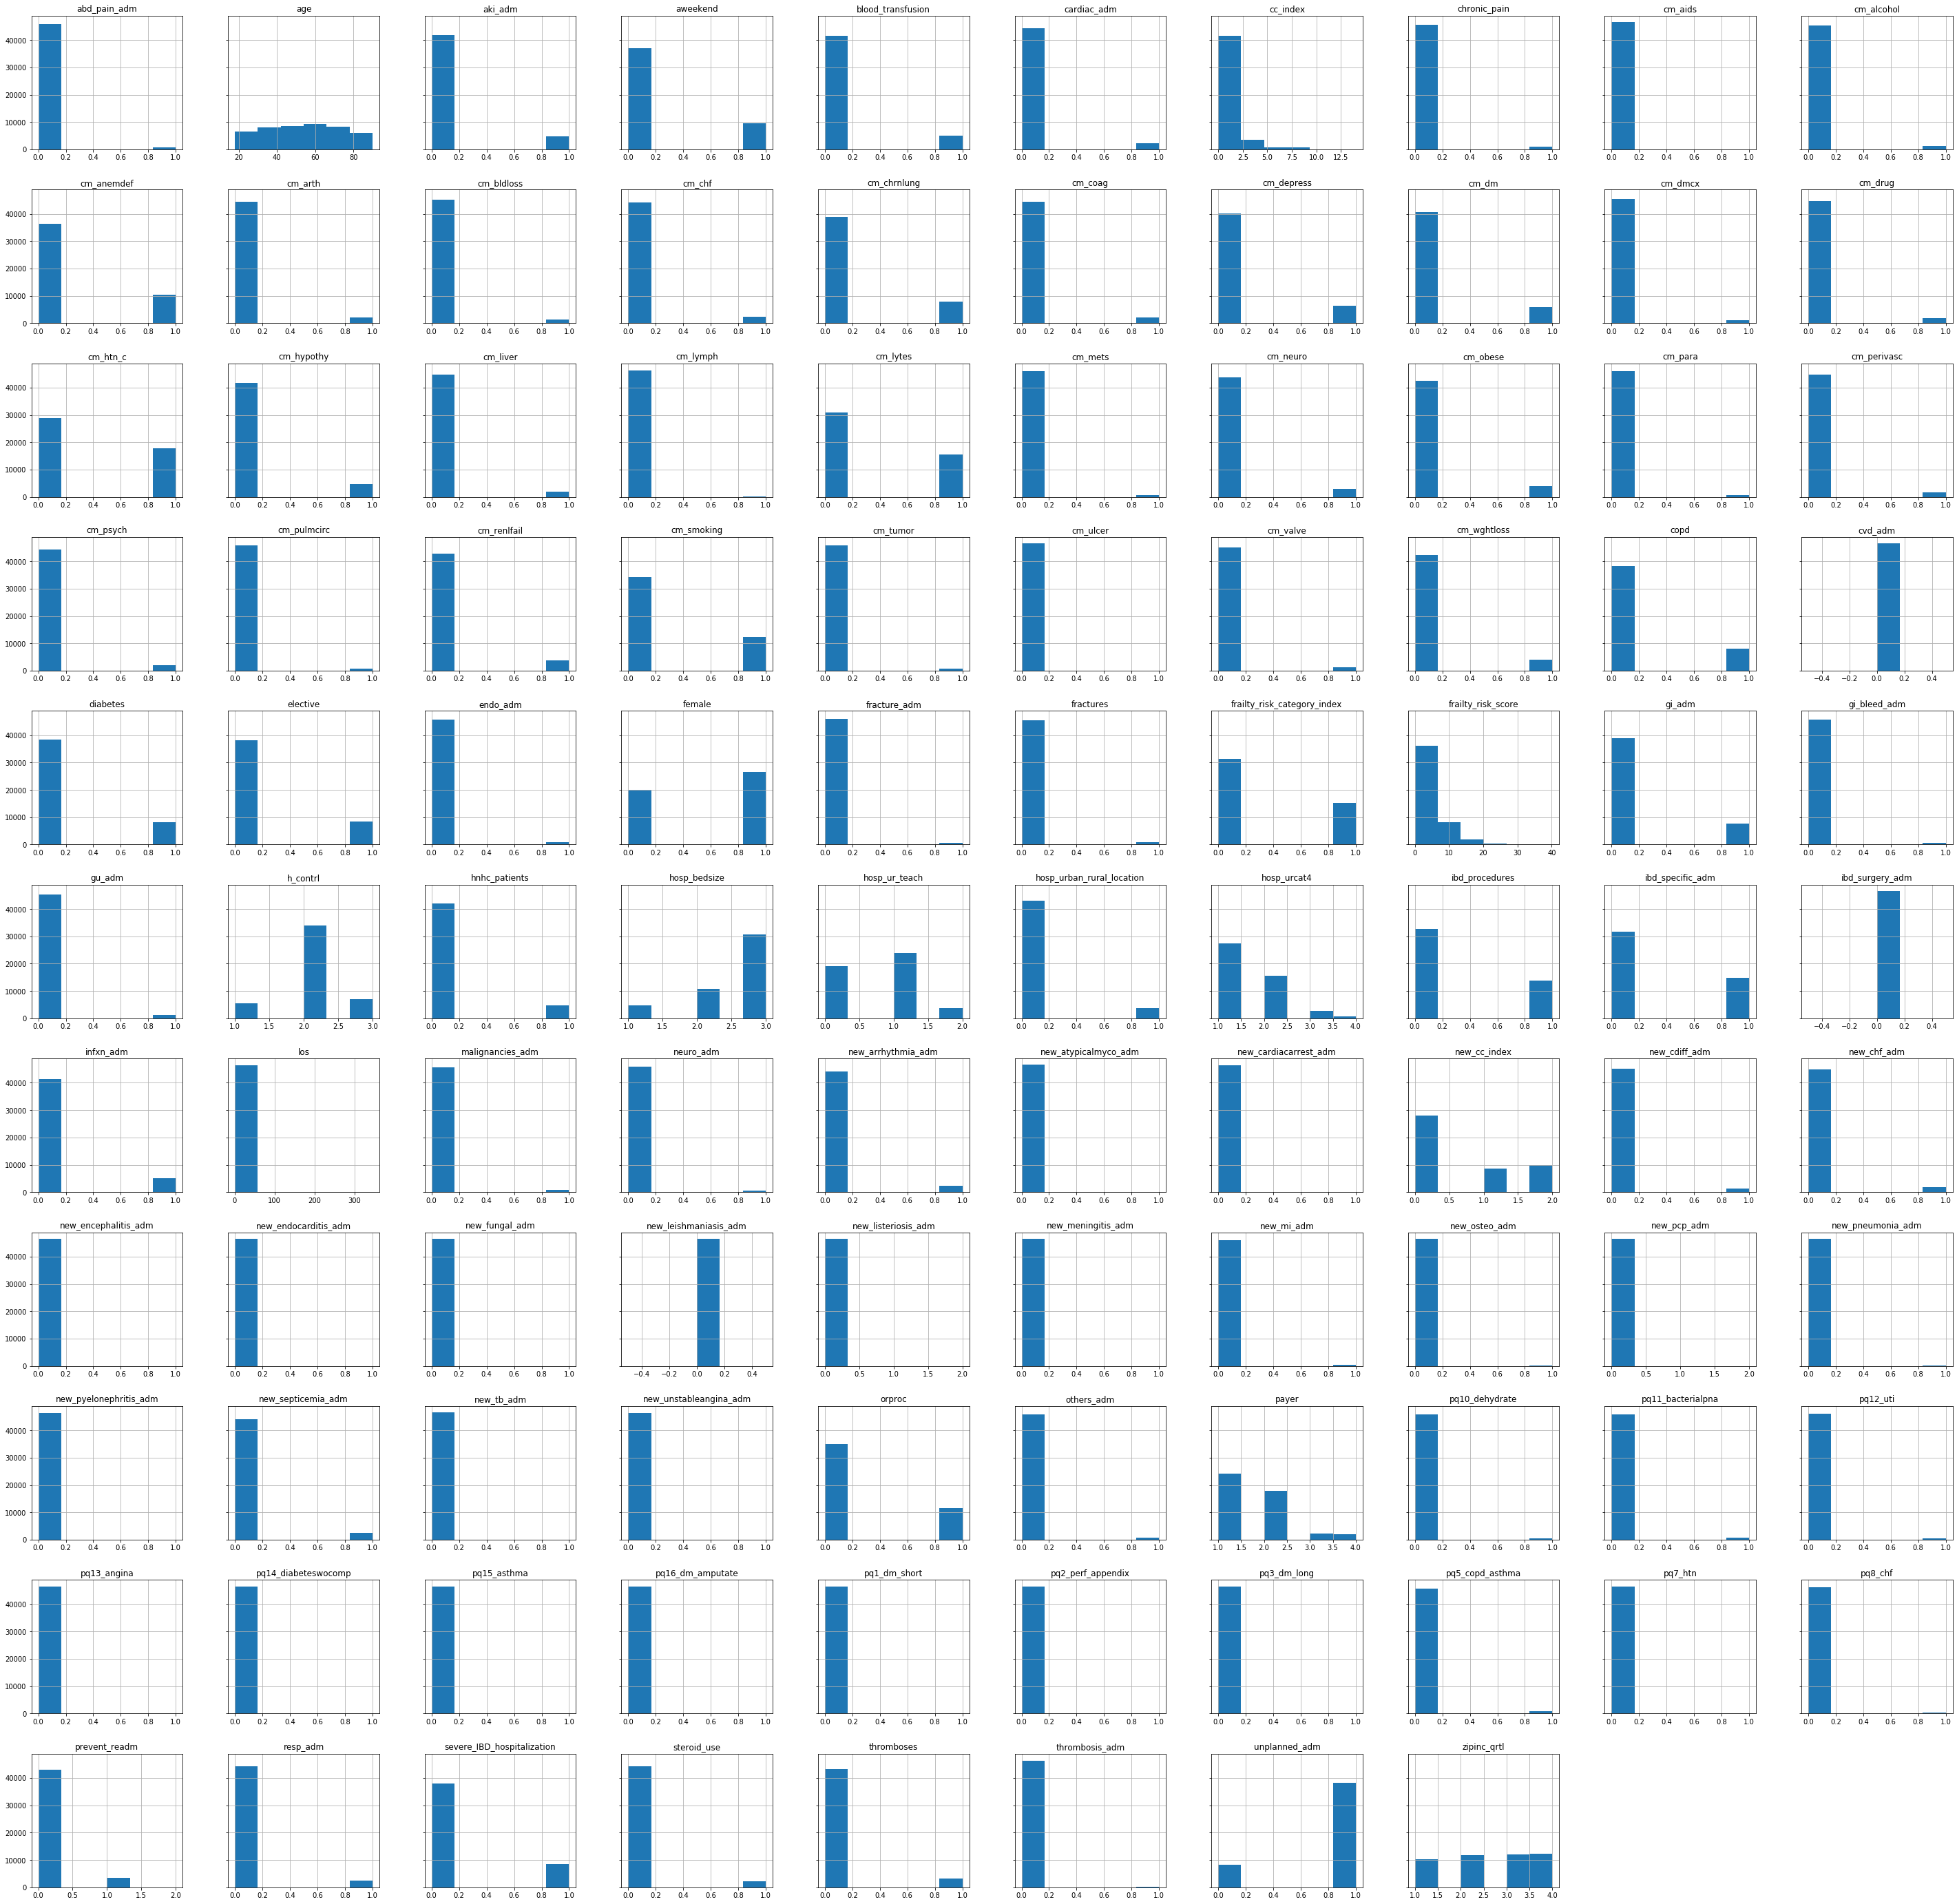

In [114]:
%matplotlib inline
hist = cleaned_data.hist(bins=6, sharey=True, figsize=(50, 50))

## Correlation Matrix <a class="anchor" id="cormatrix"></a> 

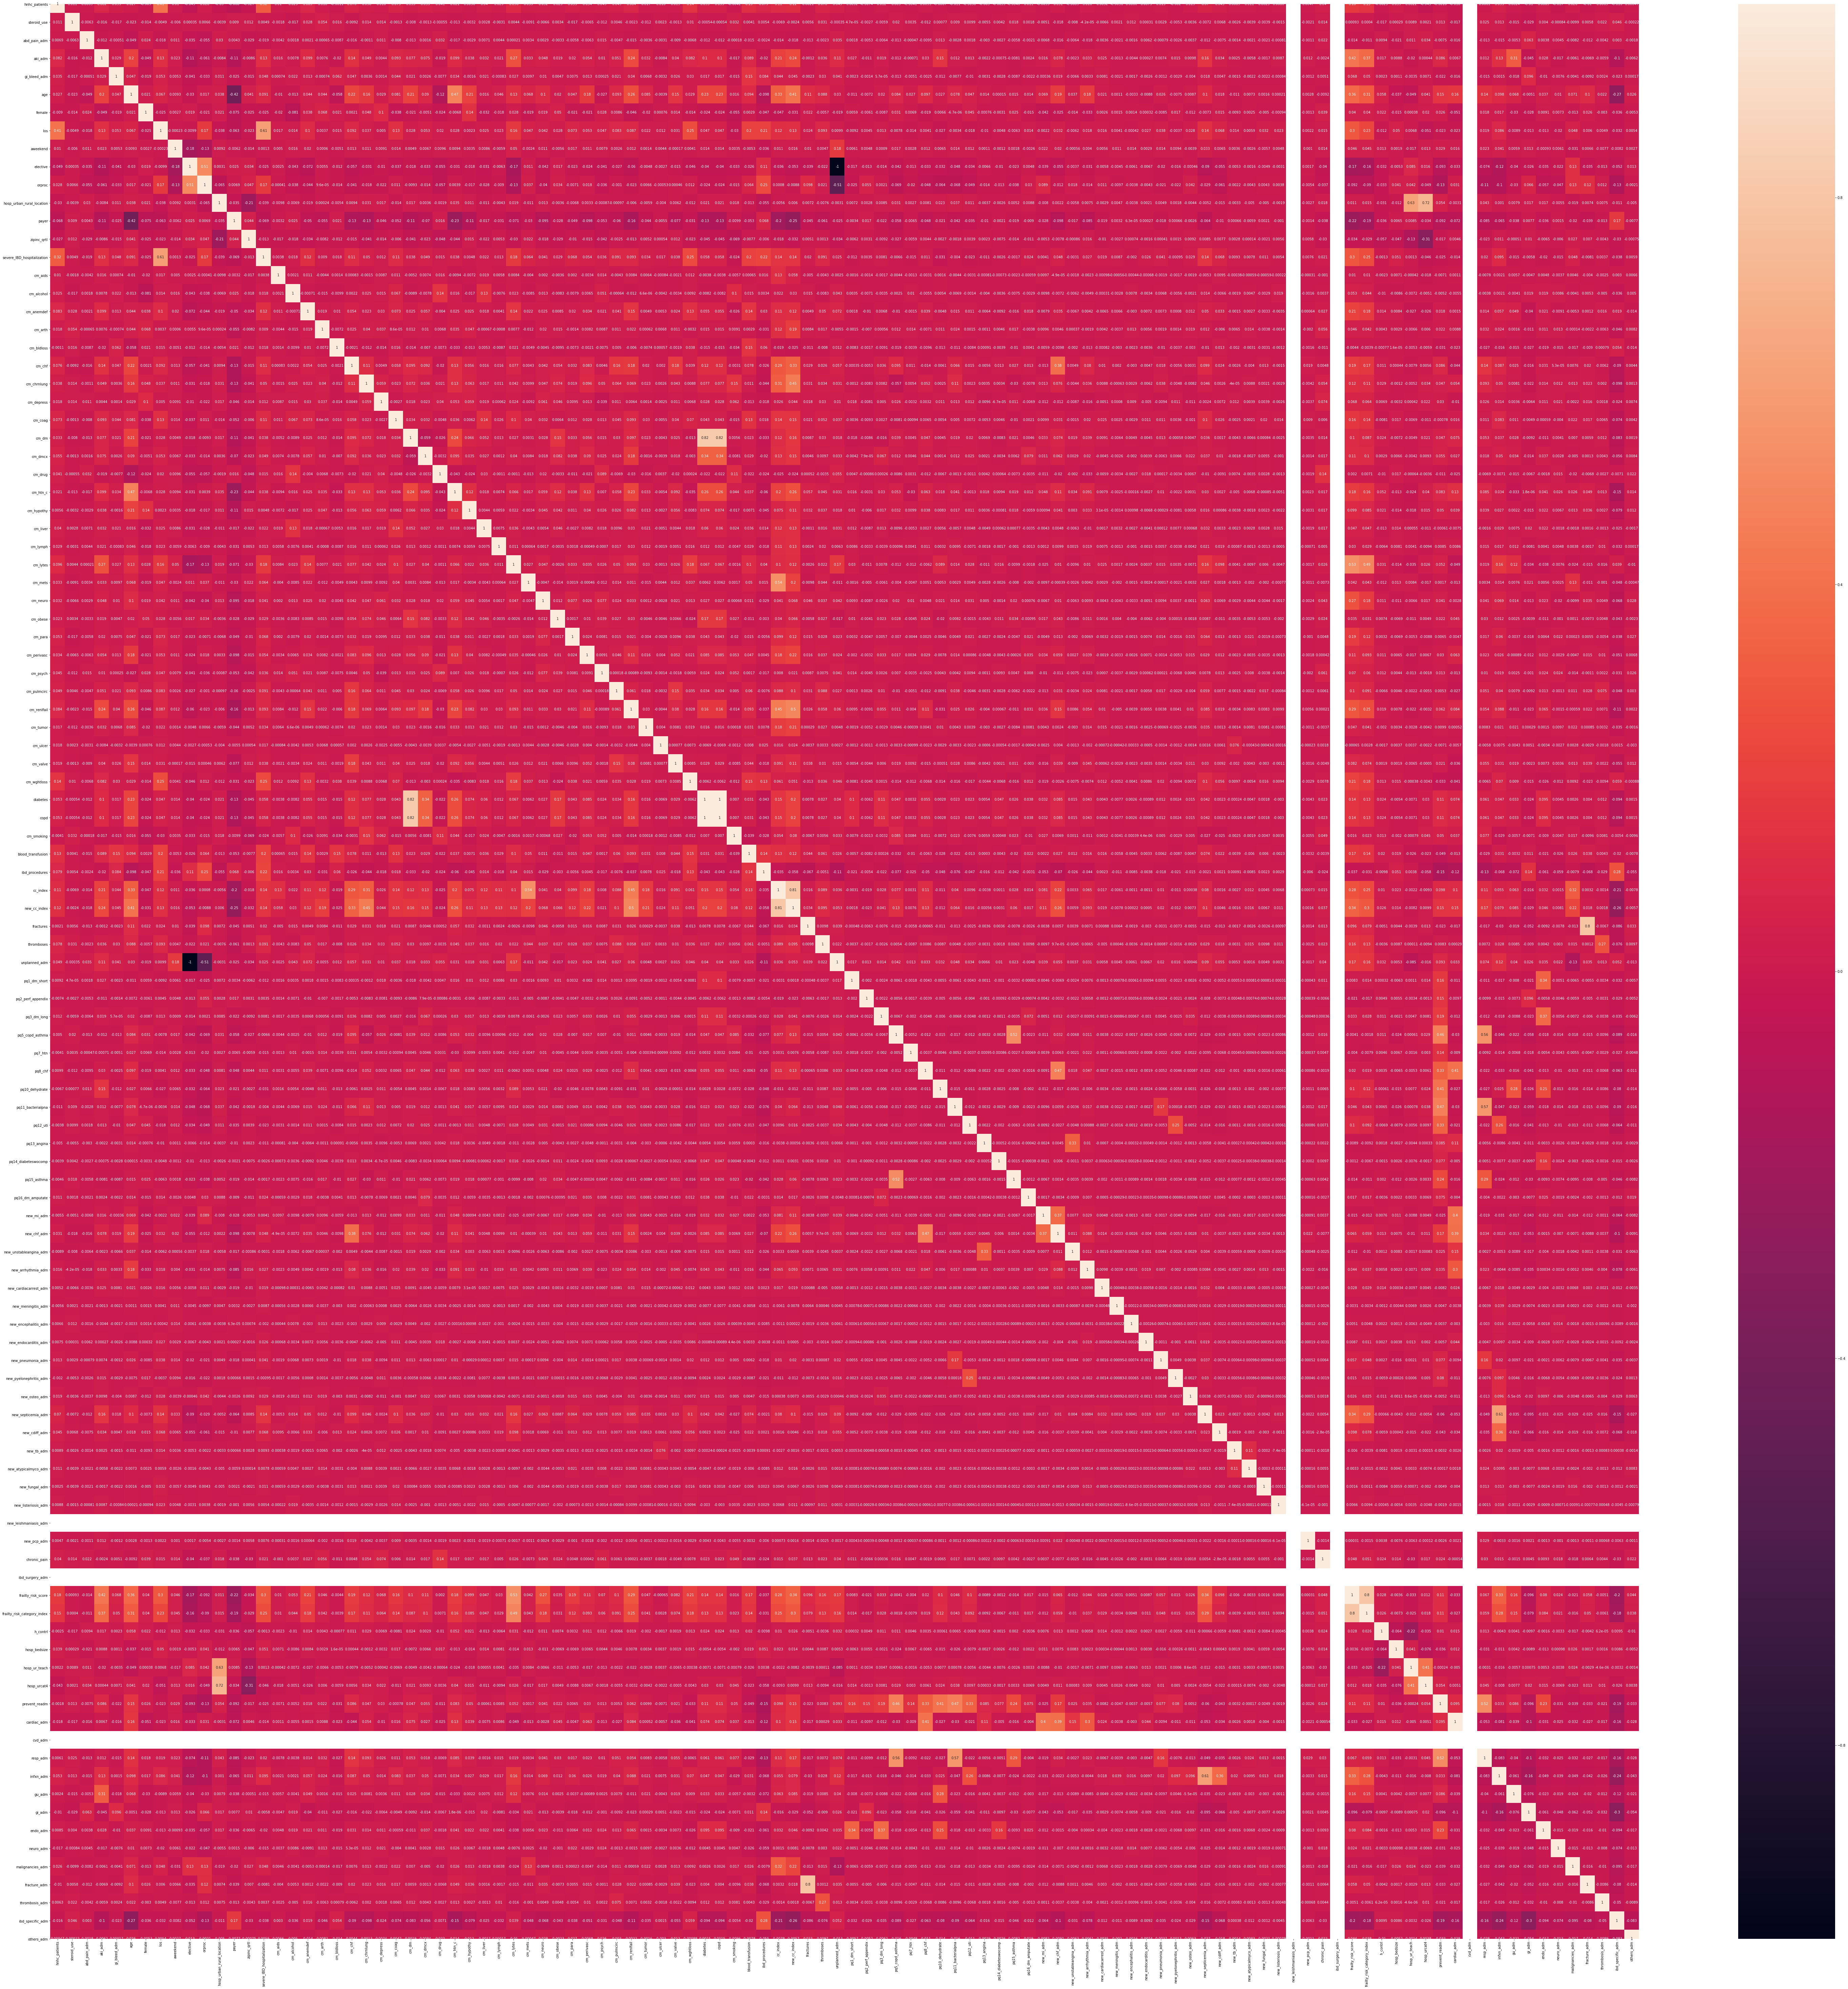

In [95]:
# Correlation matrix
corrMatrix = cleaned_data.corr()

# Generating a heatmap
import seaborn as sn
import matplotlib.pyplot as plt

# Plot the matrix
fig, ax = plt.subplots(figsize=(105,105))   # Sample figsize in inches
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [96]:
# Removing correlated features
correlated_features = set()
correlation_matrix = cleaned_data.drop('hnhc_patients', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [97]:
# Drop these features
correlated_features

{'copd',
 'diabetes',
 'fracture_adm',
 'frailty_risk_category_index',
 'new_cc_index',
 'unplanned_adm'}

In [98]:
# Grab outcome/label names after dropping na's/rows with na's
target = cleaned_data["hnhc_patients"]
target_names = ["none", "hnhc"]
target = target.astype('int64')
target

0        0
3        0
4        1
9        0
10       0
        ..
94491    0
94492    0
94493    1
94496    0
94497    0
Name: hnhc_patients, Length: 46586, dtype: int64

In [99]:
# Grab feature names after dropping na's/rows with na, also drop the correlated features
cleaned_data_wo_outcome = cleaned_data.drop(['hnhc_patients','copd',
 'diabetes',
 'fracture_adm',
 'frailty_risk_category_index',
 'new_cc_index',
 'unplanned_adm'], axis=1)
featured_names = cleaned_data_wo_outcome.columns
featured_names

Index(['steroid_use', 'abd_pain_adm', 'aki_adm', 'gi_bleed_adm', 'age',
       'female', 'los', 'aweekend', 'elective', 'orproc',
       ...
       'resp_adm', 'infxn_adm', 'gu_adm', 'gi_adm', 'endo_adm', 'neuro_adm',
       'malignancies_adm', 'thrombosis_adm', 'ibd_specific_adm', 'others_adm'],
      dtype='object', length=101)

In [26]:
# Make sure the cleaned data also has the correlated features removed
cleaned_data = cleaned_data.drop(['copd',
 'diabetes',
 'fracture_adm',
 'frailty_risk_category_index',
 'new_cc_index',
 'unplanned_adm'], axis=1)

In [27]:
# Check for na values
cleaned_data_wo_outcome.isnull().sum()

steroid_use         0
abd_pain_adm        0
aki_adm             0
gi_bleed_adm        0
age                 0
                   ..
neuro_adm           0
malignancies_adm    0
thrombosis_adm      0
ibd_specific_adm    0
others_adm          0
Length: 101, dtype: int64

# Utilizing RFE to do feature selection <a class="anchor" id="rfe"></a> 

## Logistic Regression RFE <a class="anchor" id="logisticrfe"></a> 

In [28]:
# Use Recursive Feature Elimination (RFE) to select the 5 most important features with Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

clf_log = LogisticRegression(random_state=42)
trans_log = RFE(clf_log, n_features_to_select=5)
data_trans_log = trans_log.fit_transform(cleaned_data_wo_outcome, target)
columns_retained_RFE_log = cleaned_data.iloc[:, 1:].columns[trans_log.get_support()].values
print(columns_retained_RFE_log)

['cm_lymph' 'cm_para' 'cm_renlfail' 'cm_ulcer' 'new_osteo_adm']


In [29]:
# Create a data set with the selected features and split into target and feature set
data_log = readm_data_df[['hnhc_patients', 'cm_lymph', 'cm_para', 'cm_renlfail', 'cm_ulcer', 'new_osteo_adm']]

cleaned_data_log = data_log.dropna(axis='rows')
cleaned_data_log

hnhc_patients  cm_lymph  cm_para  cm_renlfail  cm_ulcer  new_osteo_adm
0                  0         0        0            0         0              0
3                  0         0        0            0         0              0
4                  1         0        0            0         0              0
9                  0         0        0            0         0              0
10                 0         0        0            0         0              0
...              ...       ...      ...          ...       ...            ...
94491              0         0        0            0         0              0
94492              0         0        0            0         0              0
94493              1         0        0            0         0              0
94496              0         0        0            0         0              0
94497              0         0        0            0         0              0

[47402 rows x 6 columns]

In [30]:
# Grab outcome/label names after dropping na's/rows with na's
target_log = cleaned_data_log["hnhc_patients"]
target_names_log = ["none", "hnhc"]
target_log  = target_log.astype('int64')
target_log 

0        0
3        0
4        1
9        0
10       0
        ..
94491    0
94492    0
94493    1
94496    0
94497    0
Name: hnhc_patients, Length: 47402, dtype: int64

In [31]:
# Grab feature names after dropping na's/rows with na
cleaned_data_wo_outcome_log = cleaned_data_log.drop('hnhc_patients', axis=1)
featured_names_log = cleaned_data_wo_outcome_log.columns
featured_names_log

Index(['cm_lymph', 'cm_para', 'cm_renlfail', 'cm_ulcer', 'new_osteo_adm'], dtype='object')

In [32]:
# Initial model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(cleaned_data_wo_outcome_log, target_log, random_state=42)

rf_log = RandomForestClassifier(n_estimators=200)

rf_log.fit(X_train_log, y_train_log)

print(f'Training Score: {rf_log.score(X_train_log, y_train_log)}')
print(f'Testing Score: {rf_log.score(X_test_log, y_test_log)}')

Training Score: 0.8995527551967596
Testing Score: 0.9032992996371614


In [37]:
# Hypertuning parameters
from sklearn.model_selection import GridSearchCV
param_grid_log = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [5, 10, 15]}

grid_log = GridSearchCV(rf_log,param_grid_log, verbose=3)

# Printing out the grid for hypertuning
grid_log.fit(X_train_log, y_train_log)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=5, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ max_depth=5, n_estimators=50, score=0.899, total=   0.5s
[CV] max_depth=5, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ........ max_depth=5, n_estimators=50, score=0.900, total=   0.3s
[CV] max_depth=5, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] ........ max_depth=5, n_estimators=50, score=0.900, total=   0.4s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.900, total=   0.5s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.900, total=   0.7s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] ....... max_depth=5, n_estimators=100, score=0.899, total=   0.8s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] ....... max_depth=5, n_estimators=100, score=0.900, total=   0.7s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] ....... max_depth=5, n_estimators=100, score=0.900, total=   0.6s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] ....... max_depth=5, n_estimators=100, score=0.900, total=   0.6s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   55.0s finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=3)

In [38]:
# Print the best depth and estimator
print(grid_log.best_params_)
print(grid_log.best_score_)

{'max_depth': 5, 'n_estimators': 50}
0.8995527580434899


In [39]:
# Check the training and testing scores
print(f'Training Score: {grid_log.score(X_train_log, y_train_log)}')
grid_log.predict(X_test_log)
print(f'Testing Score: {grid_log.score(X_test_log, y_test_log)}')

Training Score: 0.8995527551967596
Testing Score: 0.9032992996371614


In [40]:
# Creating ROC/AUC chart for hypertuned model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc_log_rf = roc_auc_score(y_test_log.values, grid_log.predict(X_test_log))
fpr_log_rf, tpr_log_rf, thresholds_log_rf = roc_curve(y_test_log.values, grid_log.predict_proba(X_test_log)[:,1])

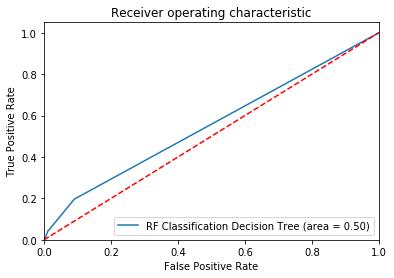

In [41]:
# Plotting the chart
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_log_rf, tpr_log_rf, label='RF Classification Decision Tree (area = %0.2f)' % rf_roc_auc_log_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_Classification_Logisitic_Regression_ROC')
plt.show()

In [42]:
# K-Fold Validation using Decision Tree Classifier
clf_log_rf = RandomForestClassifier(n_estimators=50, max_depth=5) #tree.DecisionTreeClassifier(splitter = "best", max_depth = 5)

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

scores_log_rf = cross_validate(clf_log_rf, cleaned_data_wo_outcome_log, target_log, cv=10,
                        scoring=('roc_auc', 'precision','recall', 'accuracy'),
                        return_train_score=True)
print(scores_log_rf)

{'fit_time': array([1.16386008, 0.72001004, 0.63331819, 0.98193002, 0.69380617,
       0.48934007, 0.45557117, 0.37533593, 0.370785  , 0.64072323]), 'score_time': array([0.09902883, 0.04067516, 0.03971887, 0.10963511, 0.08432579,
       0.04368401, 0.04152393, 0.04646301, 0.04416704, 0.06926179]), 'test_roc_auc': array([0.547568  , 0.56105606, 0.55952582, 0.56165244, 0.53984162,
       0.56261566, 0.53669628, 0.55483803, 0.54622471, 0.55577822]), 'train_roc_auc': array([0.55371993, 0.55219925, 0.5524236 , 0.55213017, 0.55456353,
       0.5520739 , 0.55462356, 0.55293205, 0.55387341, 0.5528392 ]), 'test_precision': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'train_precision': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'test_recall': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'train_recall': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'test_accuracy': array([0.90044294, 0.90044294, 0.90063291, 0.90063291, 0.90063291,
       0.90042194, 0.90042194, 0.90042194, 0.900

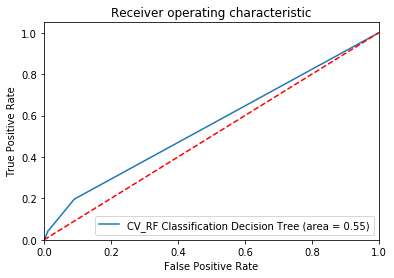

In [43]:
# Cross validated ROC/AUC chart
import matplotlib.pyplot as plt
from statistics import mean
plt.figure()
plt.plot(fpr_log_rf, tpr_log_rf, label='CV_RF Classification Decision Tree (area = %0.2f)' % mean(scores_log_rf["test_roc_auc"]))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('CV_RF_Classification_Logisitic_Regression_ROC')
plt.show()

In [44]:
# Model using LogisticRegression instead of RandomForestClassifier
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression()
classifier_log

classifier_log.fit(X_train_log, y_train_log)

print(f'Training Score: {classifier_log.score(X_train_log, y_train_log)}')
print(f'Testing Score: {classifier_log.score(X_test_log, y_test_log)}')

Training Score: 0.8994964979888048
Testing Score: 0.9032992996371614


In [45]:
# Creating ROC/AUC chart
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc_log = roc_auc_score(y_test_log.values, classifier_log.predict(X_test_log))
fpr_log, tpr_log, thresholds_log = roc_curve(y_test_log.values, classifier_log.predict_proba(X_test_log)[:,1])

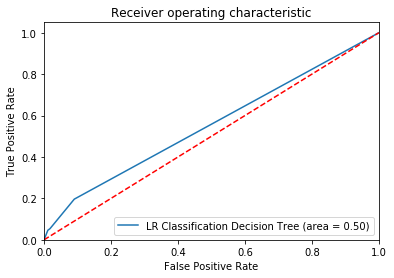

In [46]:
# Plotting ROC/AUC
import matplotlib.pyplot as plt
from statistics import mean
plt.figure()
plt.plot(fpr_log, tpr_log, label='LR Classification Decision Tree (area = %0.2f)' % rf_roc_auc_log)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LR_Classification_Logisitic_Regression_ROC')
plt.show()

In [47]:
# K-Fold Validation LogisticRegression
clf_log = LogisticRegression()

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

scores_log = cross_validate(clf_log, cleaned_data_wo_outcome_log, target_log, cv=10,
                        scoring=('roc_auc', 'precision','recall', 'accuracy'),
                        return_train_score=True)
print(scores_log)

{'fit_time': array([0.22634101, 0.11270905, 0.10957789, 0.12453222, 0.10774827,
       0.12609696, 0.13776898, 0.10152864, 0.11497211, 0.13113999]), 'score_time': array([0.01015711, 0.01243114, 0.01271415, 0.0121727 , 0.01380301,
       0.01564288, 0.01481795, 0.01770496, 0.01227498, 0.01761413]), 'test_roc_auc': array([0.54701663, 0.56013942, 0.55880617, 0.56135254, 0.53961185,
       0.5620036 , 0.54019045, 0.55461962, 0.54615323, 0.55514531]), 'train_roc_auc': array([0.55343683, 0.55193478, 0.55212931, 0.55184482, 0.55425801,
       0.55173255, 0.55416062, 0.55265   , 0.55349141, 0.5525341 ]), 'test_precision': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'train_precision': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'test_recall': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'train_recall': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'test_accuracy': array([0.90023202, 0.90044294, 0.90063291, 0.90063291, 0.90042194,
       0.90042194, 0.90042194, 0.90042194, 0.900

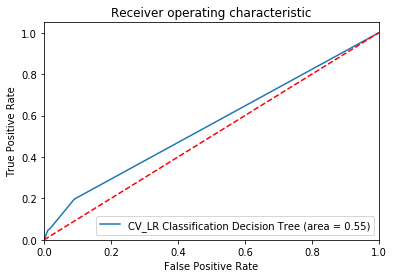

In [48]:
# Cross validated ROC/AU
import matplotlib.pyplot as plt
from statistics import mean
plt.figure()
plt.plot(fpr_log, tpr_log, label='CV_LR Classification Decision Tree (area = %0.2f)' % mean(scores_log["test_roc_auc"]))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('CV_LR_Classification_Logisitic_Regression_ROC')
plt.show()

In [49]:
# Check the feature importance using the RandomForestClassifier model
sorted(zip(rf_log.feature_importances_, X_train_log), reverse=True)

[(0.6084401621323379, 'cm_renlfail'),
 (0.1911998911484042, 'cm_para'),
 (0.09047817086702477, 'cm_lymph'),
 (0.07555466517999104, 'new_osteo_adm'),
 (0.034327110672242214, 'cm_ulcer')]

## Decision Tree Classifier RFE <a class="anchor" id="decisiontreerfe"></a> 

In [74]:
# Top 5 features
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

clf = DecisionTreeClassifier(random_state=42)
trans = RFE(clf, n_features_to_select=5)
data_trans = trans.fit_transform(cleaned_data_wo_outcome, target)
columns_retained_RFE_5 = cleaned_data.iloc[:, 1:].columns[trans.get_support()].values
print(columns_retained_RFE_5)

['age' 'los' 'zipinc_qrtl' 'cc_index' 'frailty_risk_score']


In [51]:
# THIS PART IS TO RUN FOR THE PAPER TO SEE IF WE CAN HAVE RFECV AUTO SELECT FEATURES FOR US. FOR THE PAPER, NOT THE PROJECT, WILL TAKE A WHILE TO RUN!

# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html
# https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15
# https://machinelearningmastery.com/rfe-feature-selection-in-python/

# import matplotlib.pyplot as plt
# # from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_selection import RFECV
# from sklearn.datasets import make_classification

# # Create the RFE object and compute a cross-validated score.
# rfc = RandomForestClassifier(random_state=42)
# # The "accuracy" scoring is proportional to the number of correct
# # classifications
# rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), #change to 5 afterwards
#               scoring='accuracy')
# rfecv.fit(cleaned_data_wo_outcome, target)

# print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

In [52]:
# Feature list from RFE results

data_selected = readm_data_df[['hnhc_patients', 'age', 'los', 'zipinc_qrtl', 'cc_index', 'frailty_risk_score']]

cleaned_data_selected = data_selected.dropna(axis='rows')
cleaned_data_selected

hnhc_patients  age  los  zipinc_qrtl  cc_index  frailty_risk_score
0                  0   89    4          4.0         2                 4.7
3                  0   48    4          3.0         0                 0.5
4                  1   65    5          2.0         0                 5.7
9                  0   51    3          4.0         0                 2.8
10                 0   22    6          2.0         0                 3.8
...              ...  ...  ...          ...       ...                 ...
94491              0   32    3          4.0         0                 0.0
94492              0   54    4          4.0         0                 0.0
94493              1   44    9          4.0         0                 0.0
94496              0   52    2          1.0         2                 1.5
94497              0   72    4          2.0         1                 4.7

[46685 rows x 6 columns]

In [53]:
# Grab outcome/label names after dropping na's/rows with na's
target_selected = cleaned_data_selected["hnhc_patients"]
target_names_selected = ["none", "hnhc"]
target_selected = target_selected.astype('int64')
target_selected

0        0
3        0
4        1
9        0
10       0
        ..
94491    0
94492    0
94493    1
94496    0
94497    0
Name: hnhc_patients, Length: 46685, dtype: int64

In [54]:
# Grab feature names after dropping na's/rows with na
cleaned_data_wo_outcome_selected = cleaned_data_selected.drop('hnhc_patients', axis=1)
featured_names_selected = cleaned_data_wo_outcome_selected.columns
featured_names_selected

Index(['age', 'los', 'zipinc_qrtl', 'cc_index', 'frailty_risk_score'], dtype='object')

In [132]:
# Hypertuning parameers with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_data_wo_outcome_selected, target_selected, random_state=42)

rf = RandomForestClassifier(n_estimators=200)

rf.fit(X_train, y_train)

print(f'Training Score: {rf.score(X_train, y_train)}')
print(f'Testing Score: {rf.score(X_test, y_test)}')

# Hypertuning parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [5, 10, 15]}

grid = GridSearchCV(rf,param_grid, verbose=3)

Training Score: 0.9934310113386456
Testing Score: 0.9087559972583962


In [133]:
# Printing out the grid for hypertuning
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=5, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ max_depth=5, n_estimators=50, score=0.918, total=   0.8s
[CV] max_depth=5, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ........ max_depth=5, n_estimators=50, score=0.917, total=   0.6s
[CV] max_depth=5, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] ........ max_depth=5, n_estimators=50, score=0.922, total=   0.8s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.918, total=   0.5s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.914, total=   0.6s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] ....... max_depth=5, n_estimators=100, score=0.919, total=   1.0s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] ....... max_depth=5, n_estimators=100, score=0.917, total=   1.0s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] ....... max_depth=5, n_estimators=100, score=0.922, total=   1.4s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] ....... max_depth=5, n_estimators=100, score=0.919, total=   1.2s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.5min finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=3)

In [134]:
# Print the best depth and estimator
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 5, 'n_estimators': 200}
0.9181160536617453


In [135]:
# Check the training and testing scores
print(f'Training Score: {grid.score(X_train, y_train)}')
grid.predict(X_test)
print(f'Testing Score: {grid.score(X_test, y_test)}')

Training Score: 0.9192014394653415
Testing Score: 0.9171521590130226


In [136]:
# Creating ROC/AUC chart with hypertuned model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc_rf = roc_auc_score(y_test.values, grid.predict(X_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test.values, grid.predict_proba(X_test)[:,1])

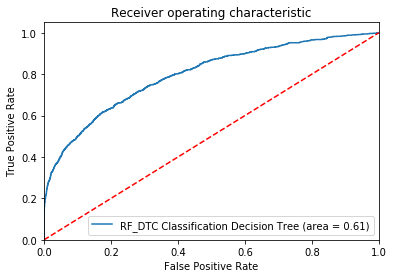

In [137]:
# Plotting the chart
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='RF_DTC Classification Decision Tree (area = %0.2f)' % rf_roc_auc_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_DTC_Classification_Logisitic_Regression_ROC')
plt.show()

### Decision Tree Viz

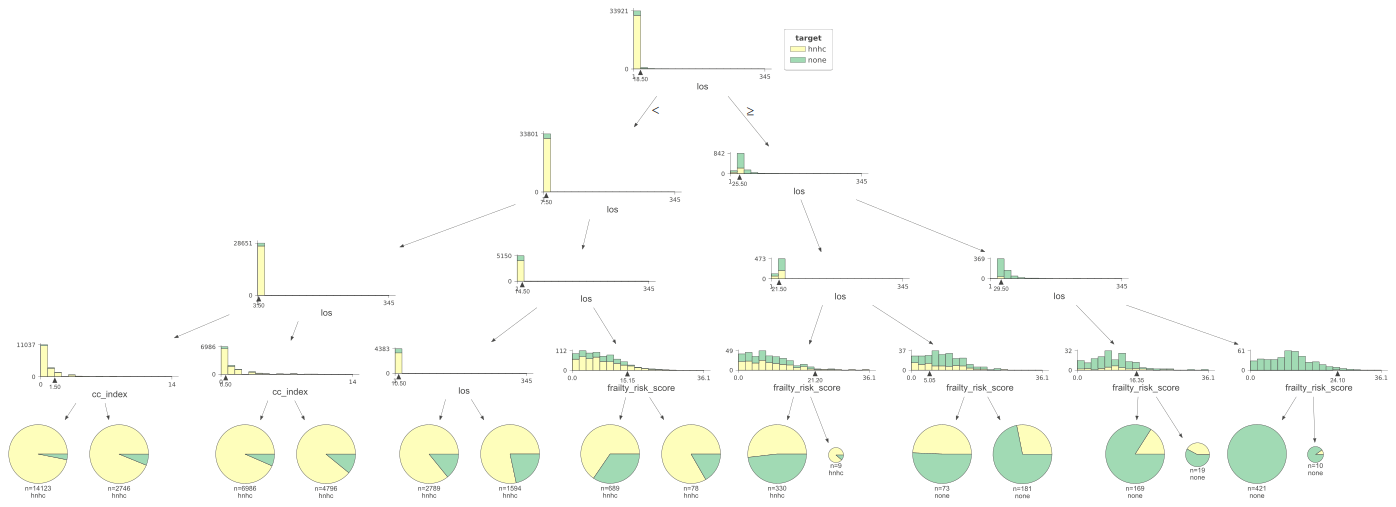

In [125]:
from dtreeviz.trees import dtreeviz

clfd = DecisionTreeClassifier(random_state=42, max_depth=4)
clfd.fit(X_train, y_train)
viz = dtreeviz(clfd,X_train, y_train,
             target_name="target",
             feature_names=featured_names_selected,
             class_names=['hnhc','none'])
viz

## KNN <a class="anchor" id="knn"></a> 

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
trans = RFE(clf, n_features_to_select=5)
data_trans = trans.fit_transform(cleaned_data_wo_outcome, target)
columns_retained_RFE_5 = cleaned_data.iloc[:, 1:].columns[trans.get_support()].values
print(columns_retained_RFE_5)

In [121]:
from sklearn.neighbors import KNeighborsClassifier

error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    


Text(0, 0.5, 'Mean Error')

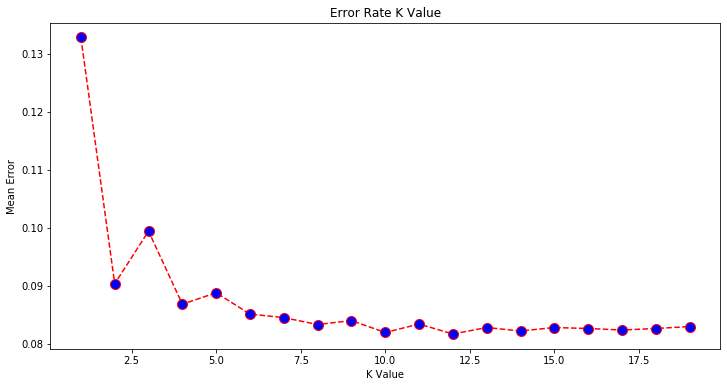

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [123]:
y_predknn = knn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predknn))
print(classification_report(y_test, y_predknn))

# Creating ROC/AUC chart for hypertuned model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc_log_knn = roc_auc_score(y_test.values, knn.predict(X_test))
fpr_log_knn, tpr_log_knn, thresholds_log_knn = roc_curve(y_test.values, knn.predict_proba(X_test)[:,1])



[[10437    78]
 [  890   267]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     10515
           1       0.77      0.23      0.36      1157

    accuracy                           0.92     11672
   macro avg       0.85      0.61      0.66     11672
weighted avg       0.91      0.92      0.90     11672



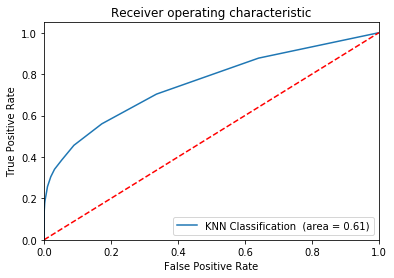

In [124]:
# Plotting the chart
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_log_knn, tpr_log_knn, label='KNN Classification  (area = %0.2f)' % knn_roc_auc_log_knn)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_Classification_Logisitic_Regression_ROC')
plt.show()

## Random Forest with Grid Search: ROC/AUC Confidence Interval <a class="anchor" id="randomforestconf"></a> 

In [138]:
import numpy as np
from scipy.stats import sem
from sklearn.metrics import roc_auc_score

print("Original ROC area: {:0.3f}".format(rf_roc_auc_rf))
y_true = y_test.values
y_pred = grid.predict(X_test)
n_bootstraps = 1000
rng_seed = 32  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))


Original ROC area: 0.610
Bootstrap #1 ROC area: 0.606
Bootstrap #2 ROC area: 0.609
Bootstrap #3 ROC area: 0.593
Bootstrap #4 ROC area: 0.604
Bootstrap #5 ROC area: 0.608
Bootstrap #6 ROC area: 0.614
Bootstrap #7 ROC area: 0.629
Bootstrap #8 ROC area: 0.612
Bootstrap #9 ROC area: 0.609
Bootstrap #10 ROC area: 0.606
Bootstrap #11 ROC area: 0.605
Bootstrap #12 ROC area: 0.614
Bootstrap #13 ROC area: 0.609
Bootstrap #14 ROC area: 0.618
Bootstrap #15 ROC area: 0.609
Bootstrap #16 ROC area: 0.613
Bootstrap #17 ROC area: 0.606
Bootstrap #18 ROC area: 0.610
Bootstrap #19 ROC area: 0.610
Bootstrap #20 ROC area: 0.614
Bootstrap #21 ROC area: 0.616
Bootstrap #22 ROC area: 0.606
Bootstrap #23 ROC area: 0.616
Bootstrap #24 ROC area: 0.604
Bootstrap #25 ROC area: 0.609
Bootstrap #26 ROC area: 0.600
Bootstrap #27 ROC area: 0.609
Bootstrap #28 ROC area: 0.610
Bootstrap #29 ROC area: 0.606
Bootstrap #30 ROC area: 0.605
Bootstrap #31 ROC area: 0.610
Bootstrap #32 ROC area: 0.611
Bootstrap #33 ROC area: 

Bootstrap #286 ROC area: 0.614
Bootstrap #287 ROC area: 0.606
Bootstrap #288 ROC area: 0.619
Bootstrap #289 ROC area: 0.611
Bootstrap #290 ROC area: 0.607
Bootstrap #291 ROC area: 0.610
Bootstrap #292 ROC area: 0.608
Bootstrap #293 ROC area: 0.609
Bootstrap #294 ROC area: 0.606
Bootstrap #295 ROC area: 0.605
Bootstrap #296 ROC area: 0.605
Bootstrap #297 ROC area: 0.616
Bootstrap #298 ROC area: 0.606
Bootstrap #299 ROC area: 0.604
Bootstrap #300 ROC area: 0.608
Bootstrap #301 ROC area: 0.615
Bootstrap #302 ROC area: 0.603
Bootstrap #303 ROC area: 0.617
Bootstrap #304 ROC area: 0.616
Bootstrap #305 ROC area: 0.609
Bootstrap #306 ROC area: 0.605
Bootstrap #307 ROC area: 0.600
Bootstrap #308 ROC area: 0.612
Bootstrap #309 ROC area: 0.612
Bootstrap #310 ROC area: 0.607
Bootstrap #311 ROC area: 0.620
Bootstrap #312 ROC area: 0.602
Bootstrap #313 ROC area: 0.607
Bootstrap #314 ROC area: 0.608
Bootstrap #315 ROC area: 0.606
Bootstrap #316 ROC area: 0.605
Bootstrap #317 ROC area: 0.614
Bootstra

Bootstrap #567 ROC area: 0.619
Bootstrap #568 ROC area: 0.617
Bootstrap #569 ROC area: 0.619
Bootstrap #570 ROC area: 0.612
Bootstrap #571 ROC area: 0.600
Bootstrap #572 ROC area: 0.618
Bootstrap #573 ROC area: 0.614
Bootstrap #574 ROC area: 0.613
Bootstrap #575 ROC area: 0.607
Bootstrap #576 ROC area: 0.603
Bootstrap #577 ROC area: 0.609
Bootstrap #578 ROC area: 0.612
Bootstrap #579 ROC area: 0.596
Bootstrap #580 ROC area: 0.602
Bootstrap #581 ROC area: 0.606
Bootstrap #582 ROC area: 0.612
Bootstrap #583 ROC area: 0.608
Bootstrap #584 ROC area: 0.615
Bootstrap #585 ROC area: 0.613
Bootstrap #586 ROC area: 0.616
Bootstrap #587 ROC area: 0.614
Bootstrap #588 ROC area: 0.609
Bootstrap #589 ROC area: 0.603
Bootstrap #590 ROC area: 0.606
Bootstrap #591 ROC area: 0.607
Bootstrap #592 ROC area: 0.620
Bootstrap #593 ROC area: 0.613
Bootstrap #594 ROC area: 0.606
Bootstrap #595 ROC area: 0.614
Bootstrap #596 ROC area: 0.612
Bootstrap #597 ROC area: 0.602
Bootstrap #598 ROC area: 0.614
Bootstra

Bootstrap #848 ROC area: 0.615
Bootstrap #849 ROC area: 0.607
Bootstrap #850 ROC area: 0.606
Bootstrap #851 ROC area: 0.607
Bootstrap #852 ROC area: 0.603
Bootstrap #853 ROC area: 0.608
Bootstrap #854 ROC area: 0.609
Bootstrap #855 ROC area: 0.606
Bootstrap #856 ROC area: 0.610
Bootstrap #857 ROC area: 0.613
Bootstrap #858 ROC area: 0.614
Bootstrap #859 ROC area: 0.598
Bootstrap #860 ROC area: 0.608
Bootstrap #861 ROC area: 0.607
Bootstrap #862 ROC area: 0.609
Bootstrap #863 ROC area: 0.603
Bootstrap #864 ROC area: 0.606
Bootstrap #865 ROC area: 0.611
Bootstrap #866 ROC area: 0.618
Bootstrap #867 ROC area: 0.604
Bootstrap #868 ROC area: 0.609
Bootstrap #869 ROC area: 0.614
Bootstrap #870 ROC area: 0.604
Bootstrap #871 ROC area: 0.613
Bootstrap #872 ROC area: 0.616
Bootstrap #873 ROC area: 0.606
Bootstrap #874 ROC area: 0.617
Bootstrap #875 ROC area: 0.623
Bootstrap #876 ROC area: 0.602
Bootstrap #877 ROC area: 0.607
Bootstrap #878 ROC area: 0.609
Bootstrap #879 ROC area: 0.606
Bootstra

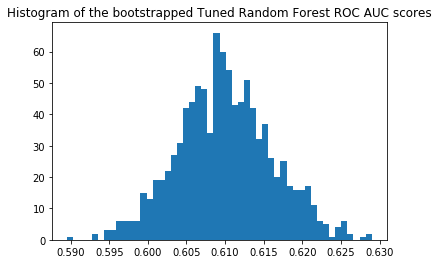

In [139]:
import matplotlib.pyplot as plt
plt.hist(bootstrapped_scores, bins=50)
plt.title('Histogram of the bootstrapped Tuned Random Forest ROC AUC scores')
plt.show()

In [140]:
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Confidence interval for the score: [0.600 - 0.62]


## K-Fold Cross Validation Random Forest <a class="anchor" id="crossvaldt"></a> 

In [143]:
# K-Fold Validation Decision Tree
clf = RandomForestClassifier(n_estimators=150, max_depth=5) #tree.DecisionTreeClassifier(splitter = "best", max_depth = 5)

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

scores = cross_validate(clf, cleaned_data_wo_outcome_selected, target_selected, cv=10,
                        scoring=('roc_auc', 'precision','recall', 'accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([3.57469392, 4.46154785, 3.3328352 , 2.6053791 , 2.32289815,
       2.75849724, 2.69676471, 2.46079707, 3.42789507, 3.03404307]), 'score_time': array([0.23997808, 0.13279915, 0.19376779, 0.12067676, 0.1959219 ,
       0.15038586, 0.13174605, 0.12272596, 0.12840104, 0.12227917]), 'test_roc_auc': array([0.77988526, 0.76721428, 0.77574046, 0.80263702, 0.76679225,
       0.79728743, 0.78987889, 0.78860342, 0.7863752 , 0.80103386]), 'train_roc_auc': array([0.79207466, 0.79437166, 0.79329004, 0.78884888, 0.79468636,
       0.7912006 , 0.79176496, 0.79167025, 0.79107132, 0.79015536]), 'test_precision': array([0.79166667, 0.73109244, 0.79166667, 0.83571429, 0.79166667,
       0.83458647, 0.81746032, 0.85384615, 0.79605263, 0.78378378]), 'train_precision': array([0.83168317, 0.8252818 , 0.8231405 , 0.83174328, 0.8371308 ,
       0.83119109, 0.82421227, 0.83161512, 0.83246978, 0.8235786 ]), 'test_recall': array([0.20430108, 0.18709677, 0.24516129, 0.2516129 , 0.20430108,
     

In [151]:
# Creating ROC/AUC chart
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test.values, clf .predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test.values, clf .predict_proba(X_test)[:,1])

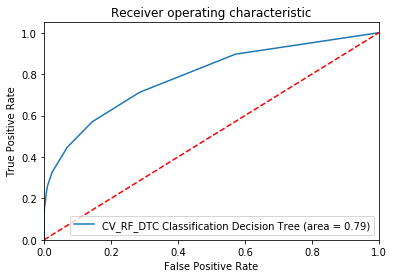

In [152]:
# Cross validated ROC/AU
import matplotlib.pyplot as plt
from statistics import mean
plt.figure()
plt.plot(fpr, tpr, label='CV_RF_DTC Classification Decision Tree (area = %0.2f)' % mean(scores["test_roc_auc"]))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('CV_RF_DTC_Classification_Logisitic_Regression_ROC')
plt.show()

## Logistic Regression Cross  Validation <a class="anchor" id="crossvallog"></a> 

In [146]:
# Using logistic regression and k-fold validation
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

classifier.fit(X_train, y_train)

print(f'Training Score: {classifier.score(X_train, y_train)}')
print(f'Testing Score: {classifier.score(X_test, y_test)}')

Training Score: 0.9177733984520036
Testing Score: 0.917323509252913


In [147]:
# Creating ROC/AUC chart
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test.values, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test.values, classifier.predict_proba(X_test)[:,1])

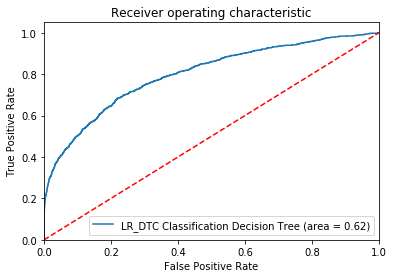

In [148]:
# Plotting chart
import matplotlib.pyplot as plt
from statistics import mean
plt.figure()
plt.plot(fpr, tpr, label='LR_DTC Classification Decision Tree (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LR_DTC_Classification_Logisitic_Regression_ROC')
plt.show()

## Logistic Regression ROC/AUC Confidence Interval <a class="anchor" id="logisticconf"></a> 

In [ ]:
import numpy as np
from scipy.stats import sem
from sklearn.metrics import roc_auc_score

print("Original ROC area: {:0.3f}".format(rf_roc_auc ))
y_true = y_test.values
y_pred = classifier.predict(X_test)
n_bootstraps = 1000
rng_seed = 32  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))


Original ROC area: 0.613
Bootstrap #1 ROC area: 0.616
Bootstrap #2 ROC area: 0.625
Bootstrap #3 ROC area: 0.608
Bootstrap #4 ROC area: 0.618
Bootstrap #5 ROC area: 0.622
Bootstrap #6 ROC area: 0.626
Bootstrap #7 ROC area: 0.637
Bootstrap #8 ROC area: 0.629
Bootstrap #9 ROC area: 0.622
Bootstrap #10 ROC area: 0.615
Bootstrap #11 ROC area: 0.624
Bootstrap #12 ROC area: 0.628
Bootstrap #13 ROC area: 0.622
Bootstrap #14 ROC area: 0.633
Bootstrap #15 ROC area: 0.628
Bootstrap #16 ROC area: 0.624
Bootstrap #17 ROC area: 0.622
Bootstrap #18 ROC area: 0.624
Bootstrap #19 ROC area: 0.623
Bootstrap #20 ROC area: 0.631
Bootstrap #21 ROC area: 0.629
Bootstrap #22 ROC area: 0.621
Bootstrap #23 ROC area: 0.630
Bootstrap #24 ROC area: 0.622
Bootstrap #25 ROC area: 0.619
Bootstrap #26 ROC area: 0.615
Bootstrap #27 ROC area: 0.623
Bootstrap #28 ROC area: 0.623
Bootstrap #29 ROC area: 0.620
Bootstrap #30 ROC area: 0.616
Bootstrap #31 ROC area: 0.625
Bootstrap #32 ROC area: 0.627
Bootstrap #33 ROC area: 

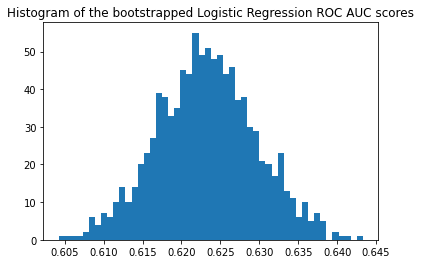

In [ ]:
import matplotlib.pyplot as plt
plt.hist(bootstrapped_scores, bins=50)
plt.title('Histogram of the bootstrapped Logistic Regression ROC AUC scores')
plt.show()

In [ ]:
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Confidence interval for the score: [0.613 - 0.634]


In [ ]:
# K-Fold Validation LogisticRegression
clf = LogisticRegression()

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

scores = cross_validate(clf, cleaned_data_wo_outcome_selected, target_selected, cv=10,
                        scoring=('roc_auc', 'precision','recall', 'accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.21856046, 0.25919628, 0.29258966, 0.27908349, 0.25681472,
       0.27979565, 0.40986753, 0.32382727, 0.26300359, 0.30488539]), 'score_time': array([0.0129323 , 0.01296544, 0.01281834, 0.0128026 , 0.01280832,
       0.01252532, 0.0133369 , 0.01270962, 0.01857376, 0.01275468]), 'test_roc_auc': array([0.78883015, 0.76731249, 0.7698894 , 0.81183793, 0.78546673,
       0.79088573, 0.79513866, 0.79107311, 0.78794313, 0.79869259]), 'train_roc_auc': array([0.78914104, 0.79164575, 0.79117502, 0.78691871, 0.78997671,
       0.78889382, 0.78862672, 0.78930692, 0.78929842, 0.78826266]), 'test_precision': array([0.75      , 0.69343066, 0.76582278, 0.7791411 , 0.73943662,
       0.78343949, 0.75159236, 0.82550336, 0.75287356, 0.73809524]), 'train_precision': array([0.76082328, 0.76223776, 0.75675676, 0.75689405, 0.75671853,
       0.7555876 , 0.75849602, 0.7537797 , 0.75609756, 0.76397967]), 'test_recall': array([0.23225806, 0.20430108, 0.26021505, 0.27311828, 0.22580645,
     

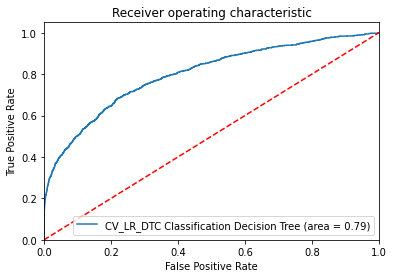

In [ ]:
# Cross validated ROC/AU
import matplotlib.pyplot as plt
from statistics import mean
plt.figure()
plt.plot(fpr, tpr, label='CV_LR_DTC Classification Decision Tree (area = %0.2f)' % mean(scores["test_roc_auc"]))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('CV_LR_DTC_Classification_Logisitic_Regression_ROC')
plt.show()

In [ ]:
# Check the feature importance using the RandomForestClassifier model
sorted(zip(rf.feature_importances_, X_train), reverse=True)

[(0.32267653477464653, 'los'),
 (0.2837781666784444, 'frailty_risk_score'),
 (0.2785139936135111, 'age'),
 (0.05910837887873094, 'zipinc_qrtl'),
 (0.055922926054667005, 'cc_index')]

## Decision Tree & Random Forest Visualizations <a class="anchor" id="viz"></a> 

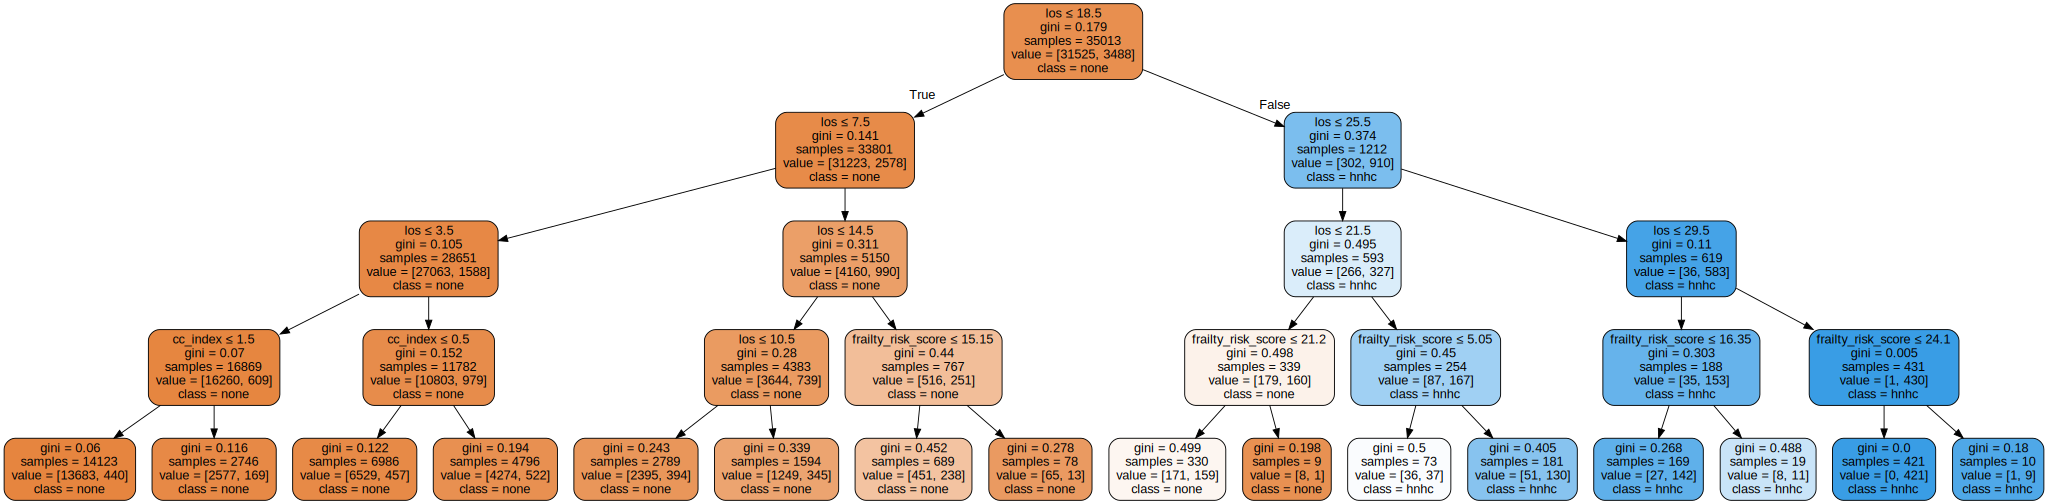

In [149]:
import graphviz 
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fitted = clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf.fitted, out_file=None, 
                  feature_names=['age', 'los', 'zipinc_qrtl', 'cc_index', 'frailty_risk_score'],  
                      class_names=["none", "hnhc"],  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph




In [ ]:
from google.colab import drive

drive.mount(‘/content/gdrive’)

import pydot

(graph,) = pydot.graph_from_dot_file('decisiontree.dot')
graph.write_png('decisiontree.png')

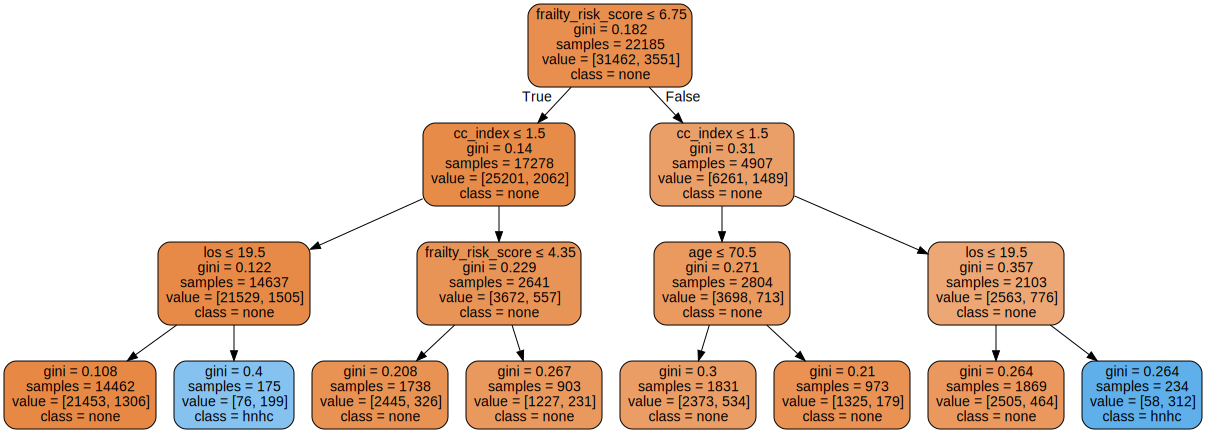

In [150]:
import graphviz 
rf = RandomForestClassifier(n_estimators=200, max_depth=3,random_state=42)
rf.fitted = rf.fit(X_train, y_train)
estimators = rf.fitted.estimators_[5]
rf_dot_data = tree.export_graphviz(estimators, out_file=None, 
                  feature_names=['age', 'los', 'zipinc_qrtl', 'cc_index', 'frailty_risk_score'],  
                      class_names=["none", "hnhc"],  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph_rf = graphviz.Source(rf_dot_data)  
graph_rf

# XGBoost Classifier Model <a class="anchor" id="xgboost"></a> 

In [70]:
# XGBClassifier
from sklearn import  metrics, model_selection
from xgboost.sklearn import XGBClassifier
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.2,
    'silent': 1,
    'n_estimators': 100,
    'min_child_weight': 0.5,
    'gamma': 1
}
model = XGBClassifier(**params).fit(X_train, y_train)

# Use the model to make predictions with the test data
y_pred = model.predict(X_test)
# How did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

[17:57:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Misclassified samples: 962
Accuracy: 0.92


In [71]:

viz = dtreeviz(model,X_train, y_train,
             target_name="target",
             feature_names=featured_names_selected,
             class_names=['hnhc','none'])
viz

ValueError: Tree model must be in (DecisionTreeRegressor, DecisionTreeClassifier, xgboost.core.Booster, but was XGBClassifier

In [ ]:
# Score
model.score(X_test,y_test)

0.9166381082933516

In [ ]:
# Creating ROC/AUC chart
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# classifier = XGBClassifier(**params)

xga_rf_roc_auc = roc_auc_score(y_test.values, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test.values, model.predict_proba(X_test)[:,1])

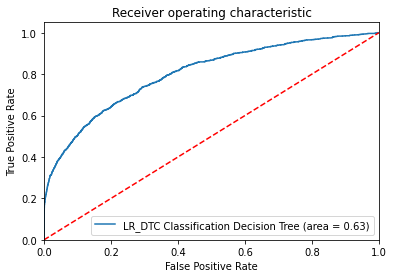

In [ ]:
# Cross validated ROC/AU
import matplotlib.pyplot as plt
from statistics import mean
plt.figure()
plt.plot(fpr, tpr, label='LR_DTC Classification Decision Tree (area = %0.2f)' % xga_rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LR_DTC_Classification_Logisitic_Regression_ROC')
plt.show()

## XGBoost AUC Confidence Interval <a class="anchor" id="xgboostconf"></a> 

In [ ]:
import numpy as np
from scipy.stats import sem
from sklearn.metrics import roc_auc_score

print("Original ROC area: {:0.3f}".format(xga_rf_roc_auc))
y_true = y_test.values
y_pred = model.predict(X_test)
n_bootstraps = 1000
rng_seed = 32  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))


Original ROC area: 0.629
Bootstrap #1 ROC area: 0.621
Bootstrap #2 ROC area: 0.633
Bootstrap #3 ROC area: 0.615
Bootstrap #4 ROC area: 0.623
Bootstrap #5 ROC area: 0.625
Bootstrap #6 ROC area: 0.633
Bootstrap #7 ROC area: 0.641
Bootstrap #8 ROC area: 0.635
Bootstrap #9 ROC area: 0.629
Bootstrap #10 ROC area: 0.624
Bootstrap #11 ROC area: 0.629
Bootstrap #12 ROC area: 0.636
Bootstrap #13 ROC area: 0.627
Bootstrap #14 ROC area: 0.635
Bootstrap #15 ROC area: 0.634
Bootstrap #16 ROC area: 0.634
Bootstrap #17 ROC area: 0.627
Bootstrap #18 ROC area: 0.630
Bootstrap #19 ROC area: 0.631
Bootstrap #20 ROC area: 0.635
Bootstrap #21 ROC area: 0.636
Bootstrap #22 ROC area: 0.624
Bootstrap #23 ROC area: 0.631
Bootstrap #24 ROC area: 0.625
Bootstrap #25 ROC area: 0.625
Bootstrap #26 ROC area: 0.625
Bootstrap #27 ROC area: 0.631
Bootstrap #28 ROC area: 0.631
Bootstrap #29 ROC area: 0.628
Bootstrap #30 ROC area: 0.621
Bootstrap #31 ROC area: 0.630
Bootstrap #32 ROC area: 0.633
Bootstrap #33 ROC area: 

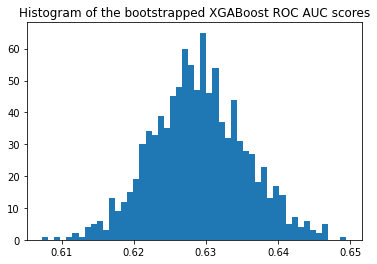

In [ ]:
import matplotlib.pyplot as plt
plt.hist(bootstrapped_scores, bins=50)
plt.title('Histogram of the bootstrapped XGABoost ROC AUC scores')
plt.show()

In [ ]:
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Confidence interval for the score: [0.619 - 0.64]


In [ ]:
# K-Fold Validation LogisticRegression
clf = XGBClassifier(**params)

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

scores = cross_validate(clf, cleaned_data_wo_outcome_selected, target_selected, cv=10,
                        scoring=('roc_auc', 'precision','recall', 'accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([1.41151571, 1.35767746, 1.36913919, 1.33963656, 1.34308386,
       1.35266232, 1.36347985, 1.35509682, 1.361619  , 1.34461808]), 'score_time': array([0.03272462, 0.02813554, 0.03139448, 0.02992964, 0.02900577,
       0.03174257, 0.03089094, 0.03177738, 0.03078485, 0.02892184]), 'test_roc_auc': array([0.78873014, 0.76986971, 0.77569366, 0.81116781, 0.78465824,
       0.79794054, 0.79690268, 0.79780366, 0.79456911, 0.80309829]), 'train_roc_auc': array([0.80890774, 0.80875913, 0.80999864, 0.80535132, 0.80759005,
       0.8072032 , 0.8072128 , 0.80739633, 0.80792881, 0.80508334]), 'test_precision': array([0.77777778, 0.74576271, 0.79432624, 0.84137931, 0.78861789,
       0.87218045, 0.82307692, 0.84732824, 0.81168831, 0.76      ]), 'train_precision': array([0.83360656, 0.8302494 , 0.82934872, 0.82692308, 0.82414911,
       0.82256746, 0.83222591, 0.83249581, 0.8226601 , 0.82469136]), 'test_recall': array([0.21075269, 0.18924731, 0.24086022, 0.26236559, 0.20860215,
     

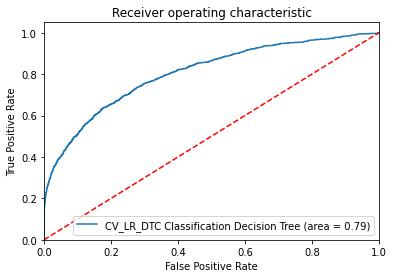

In [ ]:
# Cross validated ROC/AU
import matplotlib.pyplot as plt
from statistics import mean
plt.figure()
plt.plot(fpr, tpr, label='CV_LR_DTC Classification Decision Tree (area = %0.2f)' % mean(scores["test_roc_auc"]))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('CV_LR_DTC_Classification_Logisitic_Regression_ROC')
plt.show()

## XGBoost Visualization <a class="anchor" id="xgboostviz"></a> 

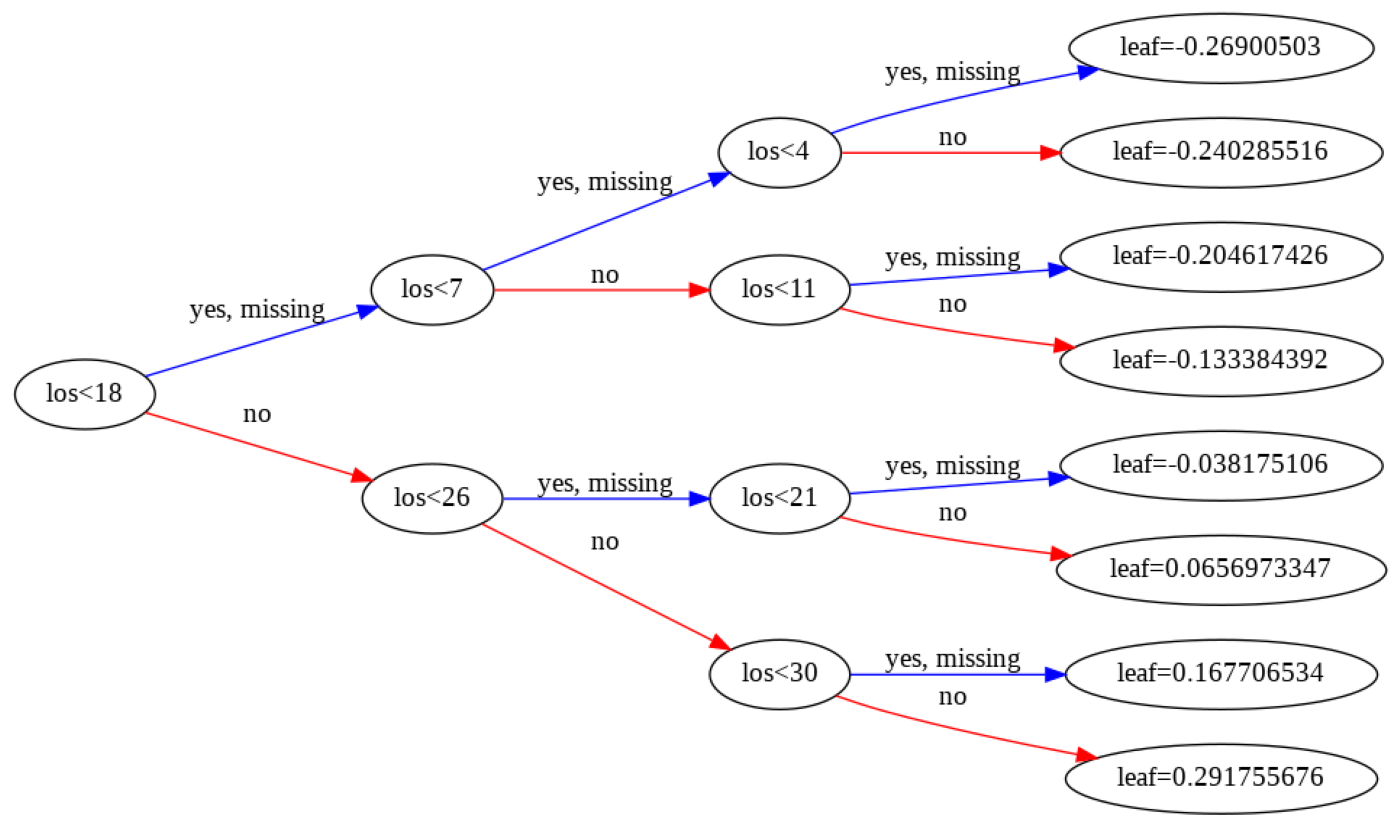

In [ ]:
from xgboost import plot_tree
plot_tree(model, num_trees=2,rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(30, 15)

In [ ]:
!pip install tpot

     |████████████████████████████████| 92kB 3.9MB/s 
     |████████████████████████████████| 157.5MB 88kB/s 
     |████████████████████████████████| 163kB 48.0MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11957 sha256=4033f718e84f3d6d9679686ae969a56d97609b32df39b8300eaffc4ee905f686
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


# Using AutoML to see if our scores are close to TPOT

In [ ]:
# Check tpot version
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.11.6.post3


In [ ]:
# TPOT Classification (AutoML)
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier

In [ ]:
# Define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# Define search
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=42, n_jobs=-1)
# Perform the search
model.fit(X_train, y_train)
# Export the best model
model.export('tpot_best_model_5_features.py')


Generation 1 - Current best internal CV score: 0.9184398485478

Generation 2 - Current best internal CV score: 0.9184398485478

Generation 3 - Current best internal CV score: 0.9184398485478

Generation 4 - Current best internal CV score: 0.9184398485478

Generation 5 - Current best internal CV score: 0.9184398485478

Best pipeline: MLPClassifier(RobustScaler(input_matrix), alpha=0.0001, learning_rate_init=0.01)


In [158]:
test = {"name": 1}
print(test)

{'name': 1}


In [183]:
type(list(test.keys())[0])

str

In [186]:
test[list(test.keys())[0]]dsds

1

In [181]:
def calc_diff(obj, limit):
	return sum(obj[list(obj.keys())[0]])-limit


In [182]:
calc_diff({ "baseball bat": 20 }, 5) 

TypeError: 'int' object is not iterable

In [174]:
calc_diff({"skate": 10, "painting": 20 }, 19)

11

In [176]:
type(test.values())

dict_values